<a href="https://colab.research.google.com/github/hstrangis/7506R_2C2022_GRUPO4/blob/main/7506R_TP1_GRUPO04_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico 1: Propiedades en venta
# Grupo 4


### Integrantes
### 101505 - Juan Bautista Botter Brun
### 106963	- Matias Daniel Rueda
### 96407 - Nicolás Hernán Strangis
### 93525 - Miguel Centellas Leon

# Imports y setup

In [ ]:
!pip install geopandas
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import geopandas as gpd
import seaborn as sns
import numpy as np
import folium
import matplotlib
import mapclassify

from sklearn.model_selection import train_test_split 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/properati_argentina_2021.csv")
#df = pd.read_csv("/content/drive/MyDrive/datasets/properati_argentina_2021.csv")

In [ ]:
#df_descrip = pd.read_csv("/content/drive/MyDrive/orga/properati_argentina_2021_decrip.csv")
df_descrip = pd.read_csv("/content/drive/MyDrive/datasets/properati_argentina_2021_decrip.csv", engine='python', encoding='utf-8', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


KeyboardInterrupt: ignored

In [ ]:
#Ajusto el dataframe a lo que quiero estudiar
df.drop(df[df["property_currency"] != "USD"].index, inplace=True);
df.drop(df[(df["property_type"] != "Casa") & (df["property_type"] != "Departamento") & (df["property_type"] != "PH")].index, inplace=True);
df.drop(df[df["place_l2"] != "Capital Federal"].index, inplace=True); 
df.drop(df[df["operation"] != "Venta"].index, inplace=True); 

In [ ]:
#Separo el dataset en train y test
df_train, df_test = train_test_split(df, test_size = 0.20, random_state=2)

In [ ]:
df_geo_barrios = gpd.read_file("/content/drive/MyDrive/orga/barrios.geojson") 
#dataset: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson
#df_geo_barrios = gpd.read_file("/content/drive/MyDrive/datasets/barrios.geojson")
df_geo_barrios['AREA'] = df_geo_barrios['AREA']/1000000 #paso de m² a km²

# Analisis exploratorio y procesamiento de datos


##Exploracion inicial


In [ ]:
df_exploracion = df_train

### Tipos de todas las variables

In [ ]:
#Veo el tipo de variable de cada columna
df_exploracion.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

###Variables cuantitativas

In [ ]:
#Armo un dataframe con informacion de cada variable cuantitativa
cuantitativas = df_exploracion[["latitud", "longitud", "property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price"]]

dicc = {}
for columnas in cuantitativas.columns.tolist():
  if (columnas not in dicc):
      dicc[columnas] = []
  dicc[columnas].append(cuantitativas[columnas].mean())
  dicc[columnas].append(cuantitativas[columnas].median())
  dicc[columnas].append(cuantitativas[columnas].mode()[0])
  dicc[columnas].append(cuantitativas[columnas].quantile([0.25][0]))
  dicc[columnas].append(cuantitativas[columnas].quantile([0.75][0]))


df_cuantitativas = pd.DataFrame(dicc, index = ["media", "mediana", "moda", "q1", "q3"])

df_cuantitativas

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
media,-34.591125,-58.450693,2.822798,2.015567,112.53916,90.110213,227331.542381
mediana,-34.595749,-58.439042,3.000000,2.000000,65.00000,57.000000,144000.000000
moda,-34.541250,-58.472966,3.000000,1.000000,50.00000,40.000000,110000.000000
q1,-34.615979,-58.466523,2.000000,1.000000,45.00000,40.000000,95000.000000
q3,-34.577395,-58.408935,4.000000,3.000000,105.00000,89.000000,235000.000000


### Variables cualitativas

**Valores posibles**

In [ ]:
#Hago lo mismo con las variable cualitativa y lo dejo en el dataframe
cualitativas = df_exploracion[["id", "start_date", "end_date", "created_on", "place_l2", "place_l3", "place_l4", "place_l5","place_l6", "operation","property_type", "property_currency", "property_title"]]
dicc = {}
for columnas in cualitativas.columns.tolist():
  if (columnas not in dicc):
      dicc[columnas] = []
  dicc[columnas].append(df[columnas].value_counts().index.size)


df_cuantitativas = pd.DataFrame(dicc, index = ["cant valores posibles"])
df_cuantitativas 

,id,start_date,end_date,created_on,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_currency,property_title
cant valores posibles,94249,365,607,365,1,57,4,0,0,1,3,1,55704


**Frecuencias**

In [ ]:
df_exploracion['place_l2'].value_counts()

Capital Federal    75399
Name: place_l2, dtype: int64

In [ ]:
df_exploracion["place_l3"].value_counts()

Palermo                 11517
Belgrano                 7092
Caballito                5727
Recoleta                 4992
Villa Urquiza            3759
Almagro                  3279
Nuñez                    2791
Villa Crespo             2518
Flores                   2500
Barrio Norte             2367
Balvanera                2046
Colegiales               1564
Villa Devoto             1544
Villa del Parque         1490
Saavedra                 1470
Puerto Madero            1210
San Telmo                1086
San Cristobal            1050
Barracas                 1010
San Nicolás              1008
Retiro                   1001
Boedo                     981
Floresta                  951
Monserrat                 899
Parque Chacabuco          840
Villa Pueyrredón          803
Coghlan                   792
Villa Luro                577
Chacarita                 570
Mataderos                 561
Villa Ortuzar             532
Liniers                   514
Parque Patricios          508
Villa Luga

In [ ]:
df_exploracion['place_l4'].value_counts()

Palermo Hollywood    1245
Palermo Chico         889
Palermo Soho          639
Palermo Viejo         137
Name: place_l4, dtype: int64

In [ ]:
df_exploracion['place_l5'].value_counts()

Series([], Name: place_l5, dtype: int64)

In [ ]:
df_exploracion['operation'].value_counts()

Venta    75399
Name: operation, dtype: int64

In [ ]:
df_exploracion['property_type'].value_counts()

Departamento    64679
PH               7406
Casa             3314
Name: property_type, dtype: int64

In [ ]:
df_exploracion['property_currency'].value_counts()

USD    75399
Name: property_currency, dtype: int64

In [ ]:
df_exploracion['property_title'].value_counts()

Departamento - Palermo                                               1192
Departamento - Recoleta                                              1068
Departamento - Belgrano                                               886
Departamento - Caballito                                              736
Departamento - Almagro                                                539
                                                                     ... 
DEPARTAMENTO VENTA CABALLITO TRES AMBIENTES                             1
VENTA  DPTO 2 AMBIENTES ALMAGRO EDIFICIO C/ PILETA                      1
DEPARTAMENTO EN VENTA VILLA LUGANO                                      1
VENTA 3 AMBIENTES DEPARTAMENTO CABALLITO                                1
BELGRANO - 2 ambientes de 50m2 en edificio full amenities - VENTA       1
Name: property_title, Length: 46446, dtype: int64

###Columnas a eliminar

In [ ]:
#A priori la columnas id, start_date,	end_date,	created_on las elimino, porque no creo utilizarlas durante mi analisis.
#Ademas como place_l5 y place_l6 no generan ningun tipo de informacion (por lo visto en cant valores posibles) tambien las elimino
#Aplico lo mismo sobre el dataframe de test
df_exploracion.drop(["id", "start_date", "end_date", "created_on","place_l5", "place_l6"], axis=1, inplace=True)
df_test.drop(["id", "start_date", "end_date", "created_on","place_l5", "place_l6"], axis=1, inplace=True)
#Y elimino las filas repetidas
df_exploracion.drop_duplicates(inplace = True);
df_test.drop_duplicates(inplace = True);

###Distribuciones

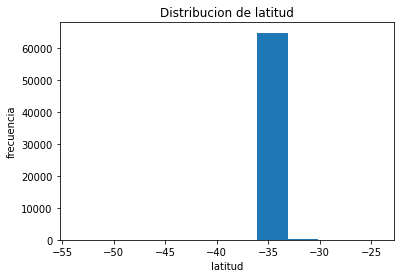

In [ ]:
plt.title("Distribucion de latitud")
plt.xlabel("latitud")
plt.ylabel("frecuencia")
plt.hist(df_exploracion["latitud"])
plt.show()

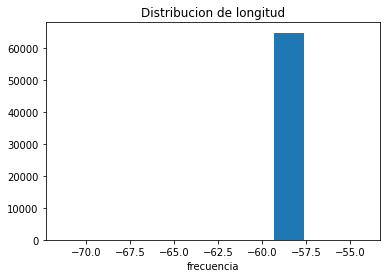

In [ ]:
plt.title("Distribucion de longitud")
plt.xlabel("longitud")
plt.xlabel("frecuencia")
plt.hist(df_exploracion["longitud"])
plt.show()

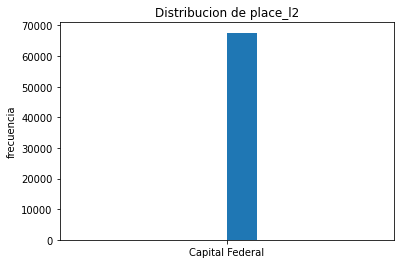

In [ ]:
plt.title("Distribucion de place_l2")
plt.ylabel("frecuencia")
plt.hist(df_exploracion["place_l2"])
plt.show()

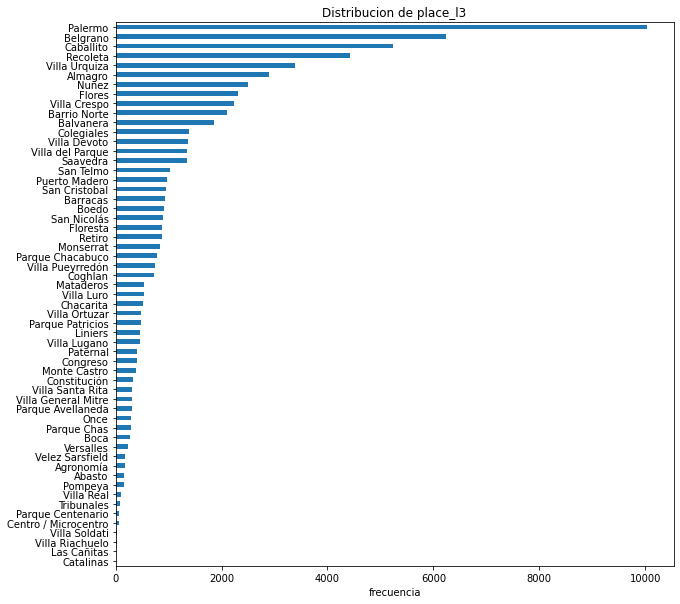

In [ ]:
plt.title("Distribucion de place_l3")
plt.xlabel("frecuencia")
df_exploracion["place_l3"].value_counts(ascending=True).plot.barh(figsize = (10,10))
plt.show()

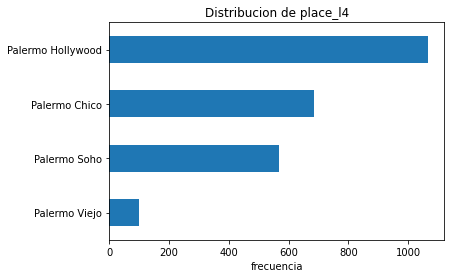

In [ ]:
plt.title("Distribucion de place_l4")
plt.xlabel("frecuencia")
df_exploracion["place_l4"].value_counts(ascending=True).plot.barh()
plt.show()

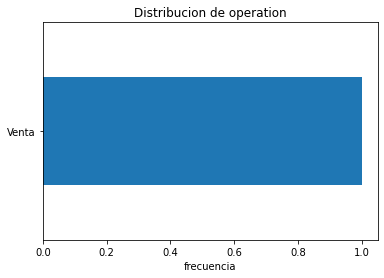

In [ ]:
plt.title("Distribucion de operation")
plt.xlabel("frecuencia")
df_exploracion["operation"].value_counts(ascending=True,normalize=True).plot.barh()
plt.show()

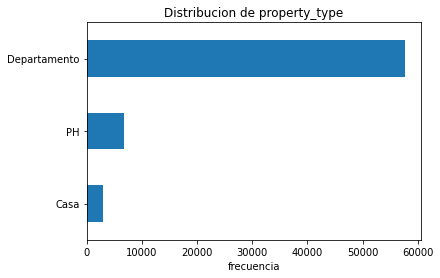

In [ ]:
plt.title("Distribucion de property_type")
plt.xlabel("frecuencia")
df_exploracion["property_type"].value_counts(ascending=True).plot.barh()
plt.show()

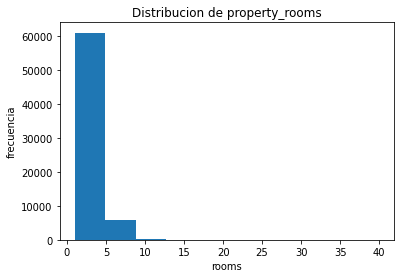

In [ ]:
plt.title("Distribucion de property_rooms")
plt.xlabel("rooms")
plt.ylabel("frecuencia")
plt.hist(df_exploracion["property_rooms"])
plt.show()

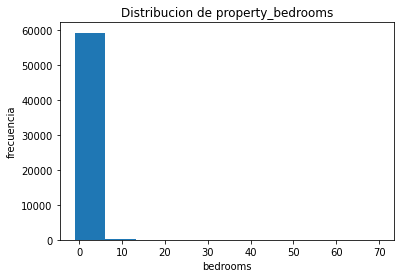

In [ ]:
plt.title("Distribucion de property_bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("frecuencia")
plt.hist(df_exploracion["property_bedrooms"])
plt.show()

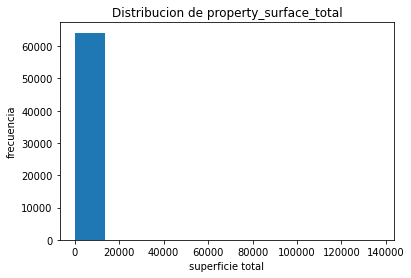

In [ ]:
plt.title("Distribucion de property_surface_total")
plt.xlabel("superficie total")
plt.ylabel("frecuencia")
plt.hist(df_exploracion["property_surface_total"])
plt.show()

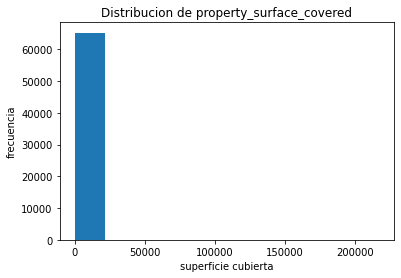

In [ ]:
plt.title("Distribucion de property_surface_covered")
plt.xlabel("superficie cubierta")
plt.ylabel("frecuencia")
plt.hist(df_exploracion["property_surface_covered"])
plt.show()

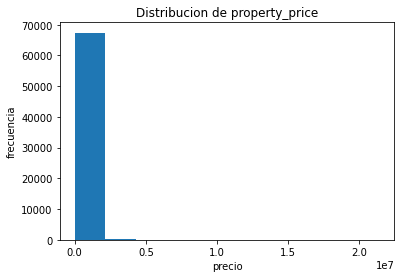

In [ ]:
plt.title("Distribucion de property_price")
plt.ylabel("frecuencia")
plt.xlabel("precio")
plt.hist(df_exploracion["property_price"])
plt.show()

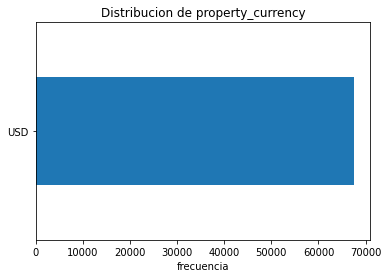

In [ ]:
plt.title("Distribucion de property_currency")
plt.xlabel("frecuencia")
df_exploracion["property_currency"].value_counts().plot.barh()
plt.show()

### Correlacion

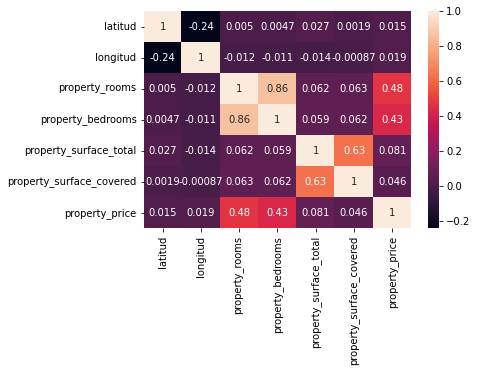

In [ ]:
import seaborn as sns
sns.heatmap(df_exploracion.corr(),annot=True)

### Me quedo solo con las publicaciones de casas, departamentos y PH's en venta en USD en CABA

In [ ]:
gdf_caba = gpd.GeoDataFrame(df.loc[(df['place_l2'] == 'Capital Federal') & (df['operation'] == 'Venta') & (df['property_currency'] == 'USD') & (
    (df['property_type'] == 'Departamento') | (df['property_type'] == 'PH') | (df['property_type'] == 'Casa'))]);

### Agrego un label geometry (Usado por geopandas) con las coordenadas de la propiedad



In [ ]:
gdf_caba['geometry'] = gpd.points_from_xy(gdf_caba.longitud, gdf_caba.latitud)

### Cuento cuántas publicaciones hay en cada barrio y las divido por el tamaño del barrio para obtener la densidad de publicaciones por barrio

In [ ]:
df_geo_barrios['PUBLICACIONES'] = df_geo_barrios.apply(lambda x:
     gdf_caba['geometry'].within(x['geometry']).sum(), axis=1)
df_geo_barrios['DENSIDAD_DE_PUBLICACIONES'] = df_geo_barrios['PUBLICACIONES']/df_geo_barrios['AREA']

NameError: ignored

In [ ]:
df_geo_barrios.explore(column="DENSIDAD_DE_PUBLICACIONES", # make choropleth based on "DENSIDAD_DE_PUBLICACIONES" column
                       tooltip=["BARRIO", "DENSIDAD_DE_PUBLICACIONES", "PUBLICACIONES", "AREA"], # show values in tooltip (on hover)
                       tiles="CartoDB positron",
                       vmin=0, vmax=1300, cmap="plasma")

##Datos Faltantes

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
df_b = df_exploracion.copy()

**Análisis de faltantes en columnas**

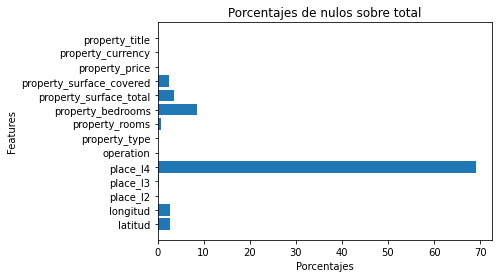

In [ ]:
#Análisis de datos NaN
n_filas = df.shape[0]
lista_porcentajes_nulos = (df_b.isna().sum() / n_filas*100).tolist()
lista_columnas = df_b.columns.tolist()
plt.barh(lista_columnas, lista_porcentajes_nulos)
plt.ylabel("Features")
plt.xlabel("Porcentajes")
plt.title("Porcentajes de nulos sobre total")
plt.show()

In [ ]:
tienen_dato_vacio = df_b.astype('str').eq(' ').any(0)
tienen_dato_vacio

latitud                     False
longitud                    False
place_l2                    False
place_l3                    False
place_l4                    False
operation                   False
property_type               False
property_rooms              False
property_bedrooms           False
property_surface_total      False
property_surface_covered    False
property_price              False
property_currency           False
property_title              False
dtype: bool

In [ ]:
tienen_guion = df_b.astype('str').eq('-').any(0)
tienen_guion

latitud                     False
longitud                    False
place_l2                    False
place_l3                    False
place_l4                    False
operation                   False
property_type               False
property_rooms              False
property_bedrooms           False
property_surface_total      False
property_surface_covered    False
property_price              False
property_currency           False
property_title              False
dtype: bool

**Cantidad de valores negativos en las columnas numéricas positivas**

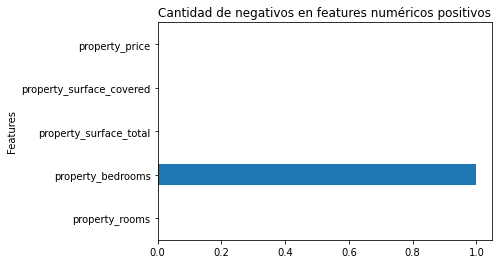

In [ ]:
columnas_numericas_positivas = ['property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price']
df_numericos = df_b[columnas_numericas_positivas]
df_numericos[df_numericos < 0].count().plot.barh(title="Cantidad de negativos en features numéricos positivos" , xlabel="Features", ylabel="Negativos")


In [ ]:
#Corrijo el error
df_b.loc[df_b.property_bedrooms == -1, "property_bedrooms"] = 1

**Análisis de faltantes en filas**

In [ ]:
#Creo un dataframe con la suma de features nulos que hay por fila
df_cols_nulas = (df_b.isna().sum(axis=1) / df_b.shape[1]*100).round().to_frame()
df_cols_nulas = df_cols_nulas.reset_index()
df_cols_nulas.columns = ['Filas', 'Promedio_NaN']

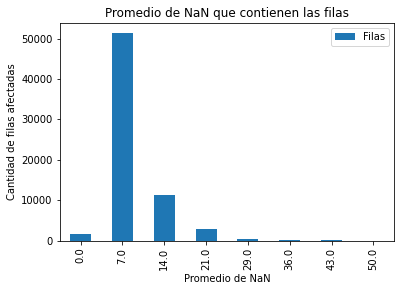

In [ ]:
#Grafico agrupando la cantidad de filas que contienen la respectiva cantidad de Nan
grf_nulos_group = df_cols_nulas.groupby("Promedio_NaN").count().plot.bar(title="Promedio de NaN que contienen las filas" , xlabel="Promedio de NaN", ylabel="Cantidad de filas afectadas")


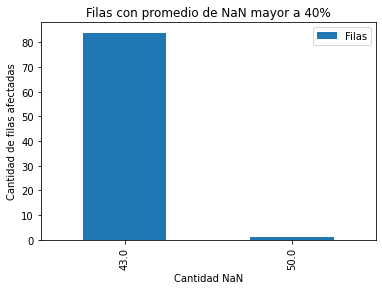

In [ ]:
#Grafico a parte las que tienen promedio de nulos > 40 para distinguirlas mejor
df_cols_nulas_mayores = df_cols_nulas[df_cols_nulas.Promedio_NaN > 40]
df_cols_nulas_mayores.groupby("Promedio_NaN").count().plot.bar(title="Filas con promedio de NaN mayor a 40%" , xlabel="Cantidad NaN", ylabel="Cantidad de filas afectadas")

In [ ]:
#Al tratarse de una columnas con mas del 65% de datos nulos, es mejor elimnarla
#Ya que incluso si pudiesemos reconstruir los datos de esta columna, es muy probable
#que no se parezcan a la realidad, por lo tanto tampoco me servirian

df_b.drop(["place_l4"], axis='columns', inplace=True)

In [ ]:
#Como el resto de las columnas tienen un porcentaje de valores nulos bajos
#Decido imputar los datos 
#Para el caso de property_rooms, y property_bedrooms decido agregarle la moda
#Ya que al ser valor mas comun es muy poco probable que pueda generar algun problema

moda = df_b["property_rooms"].mode()[0];
df_b["property_rooms"] = df_b["property_rooms"].fillna(moda)

moda = df_b["property_bedrooms"].mode()[0];
df_b["property_bedrooms"] = df_b["property_bedrooms"].fillna(moda)

In [ ]:
#Para el caso de place_l3 decido agregar una nueva categoria llamada "Barrio Faltante"
#para asi solucionar el problema en esta columna
df_b['place_l3'] = df_b['place_l3'].fillna("Barrio faltante")

In [ ]:
#Para el resto de valores faltantes del resto de columnas ,utilizo IterativeImputer

columnas = ["latitud", "longitud","property_surface_total",	"property_surface_covered",	"property_price"]

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0)
df_b_completo=imp.fit_transform(df_b[columnas])
df_b[columnas] = df_b_completo


In [ ]:
df_b.isna().sum()

latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
operation                   0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_currency           0
property_title              0
dtype: int64

In [ ]:
#Realizo el mismo procedimiento de imputacion y eliminacion  para el dataframe de test

#Elimino la columna place_l4
df_test.drop(["place_l4"], axis='columns', inplace=True)

#Imputo los datos
moda = df_test["property_rooms"].mode()[0];
df_test["property_rooms"] = df_test["property_rooms"].fillna(moda)

moda = df_test["property_bedrooms"].mode()[0];
df_test["property_bedrooms"] = df_test["property_bedrooms"].fillna(moda)

df_test['place_l3'] = df_test['place_l3'].fillna("Barrio faltante")

columnas = ["latitud", "longitud","property_surface_total",	"property_surface_covered",	"property_price"]

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0)
df_test_completo=imp.fit_transform(df_test[columnas])
df_test[columnas] = df_test_completo

In [ ]:
#Arreglo errores que pudieron surgir de la imputacion de datos
df_b.loc[:, "property_surface_total"] = round(df_b.loc[:, "property_surface_total"],1)
df_b.loc[:, "property_surface_covered"] = round(df_b.loc[:, "property_surface_covered"],1)

In [ ]:
#Lo mismo para test
df_test.loc[:, "property_surface_total"] = round(df_test.loc[:, "property_surface_total"],1)
df_test.loc[:, "property_surface_covered"] = round(df_test.loc[:, "property_surface_covered"],1)

### Comparacion de distribuciones

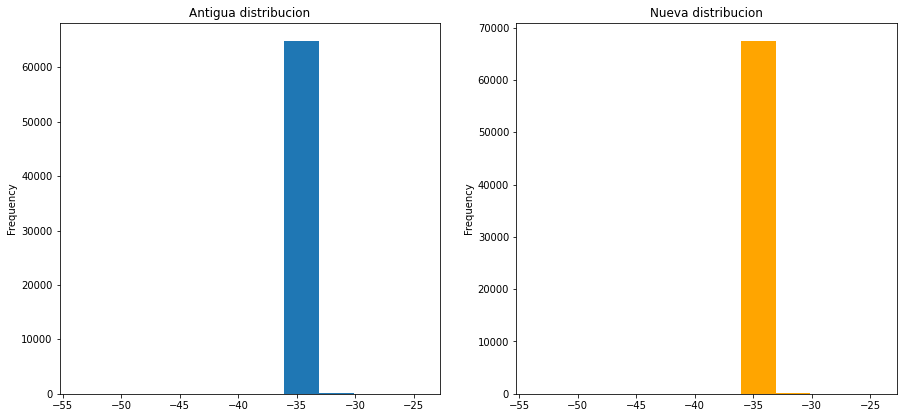

In [ ]:
figure, axes = plt.subplots(figsize=(15, 15))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["latitud"].plot.hist();
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["latitud"].plot.hist(color="orange");

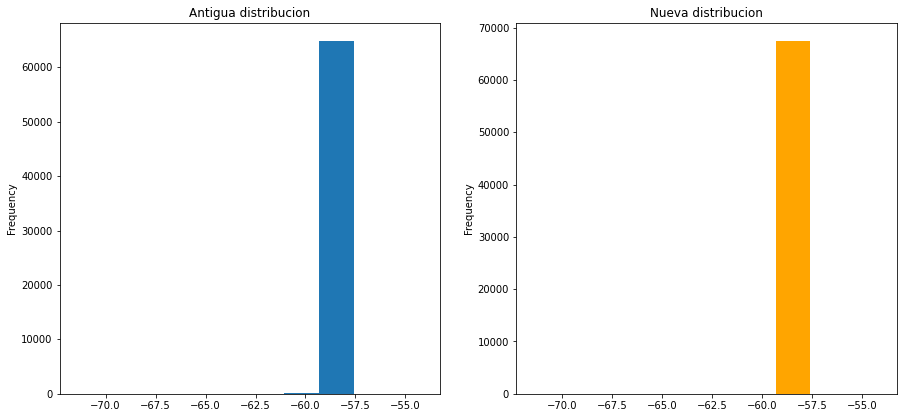

In [ ]:
figure, axes = plt.subplots(figsize=(15, 15))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["longitud"].plot.hist();
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["longitud"].plot.hist(color="orange");

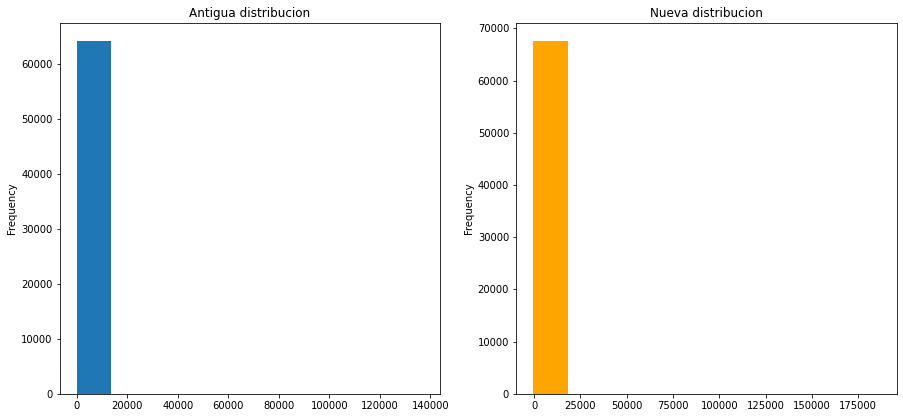

In [ ]:
figure, axes = plt.subplots(figsize=(15, 15))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["property_surface_total"].plot.hist();
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["property_surface_total"].plot.hist(color="orange");

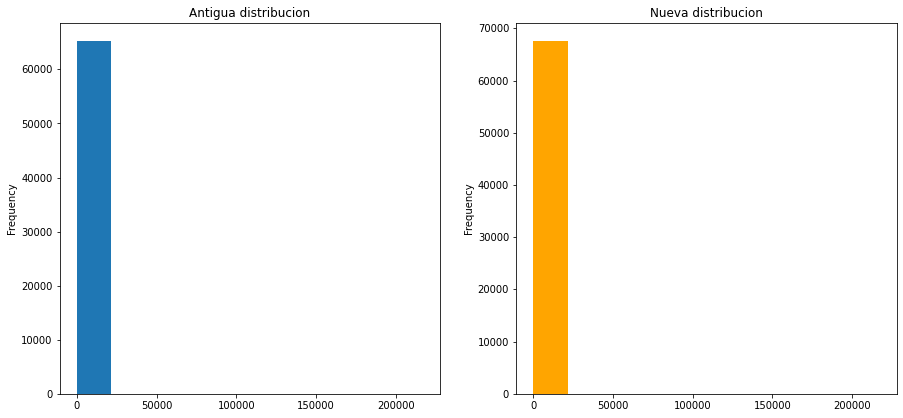

In [ ]:
figure, axes = plt.subplots(figsize=(15, 15))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["property_surface_covered"].plot.hist();
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["property_surface_covered"].plot.hist(color="orange");

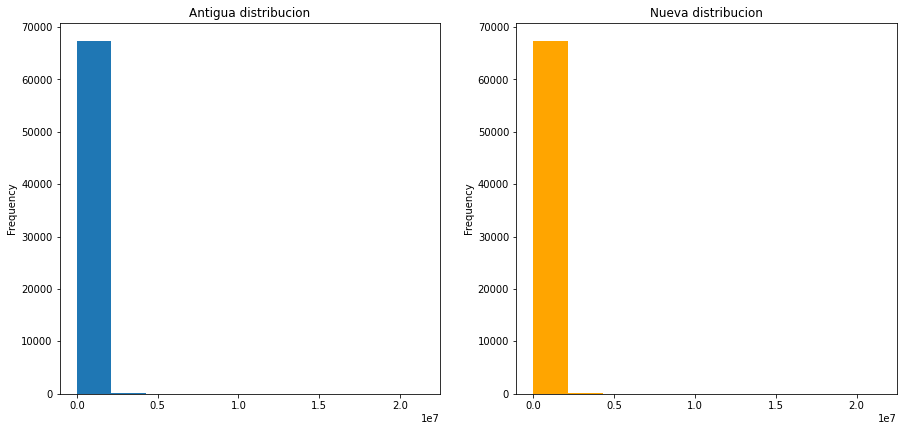

In [ ]:
figure, axes = plt.subplots(figsize=(15, 15))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["property_price"].plot.hist();
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["property_price"].plot.hist(color="orange");

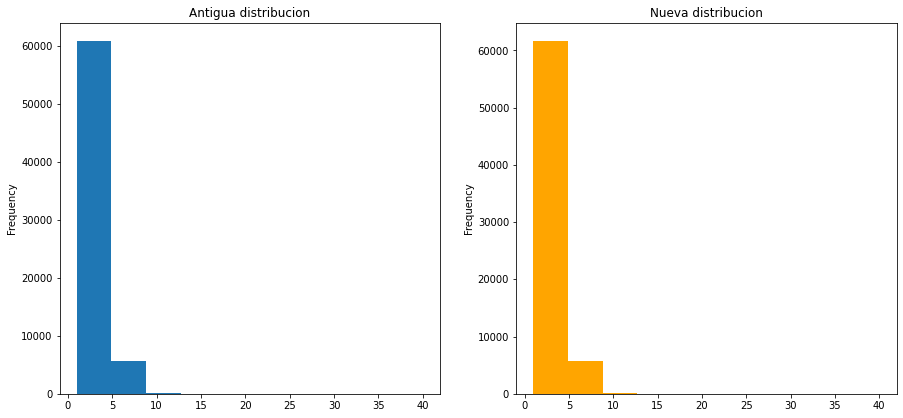

In [ ]:
figure, axes = plt.subplots(figsize=(15, 15))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["property_rooms"].plot.hist();
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["property_rooms"].plot.hist(color="orange");

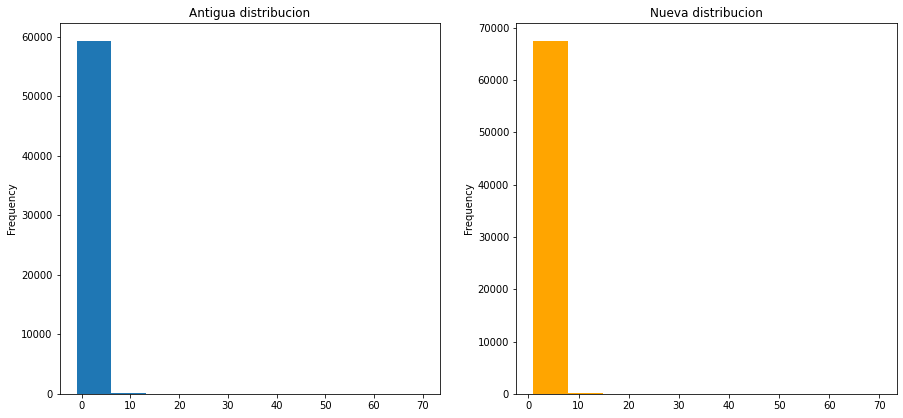

In [ ]:
figure, axes = plt.subplots(figsize=(15, 15))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["property_bedrooms"].plot.hist();
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["property_bedrooms"].plot.hist(color="orange");

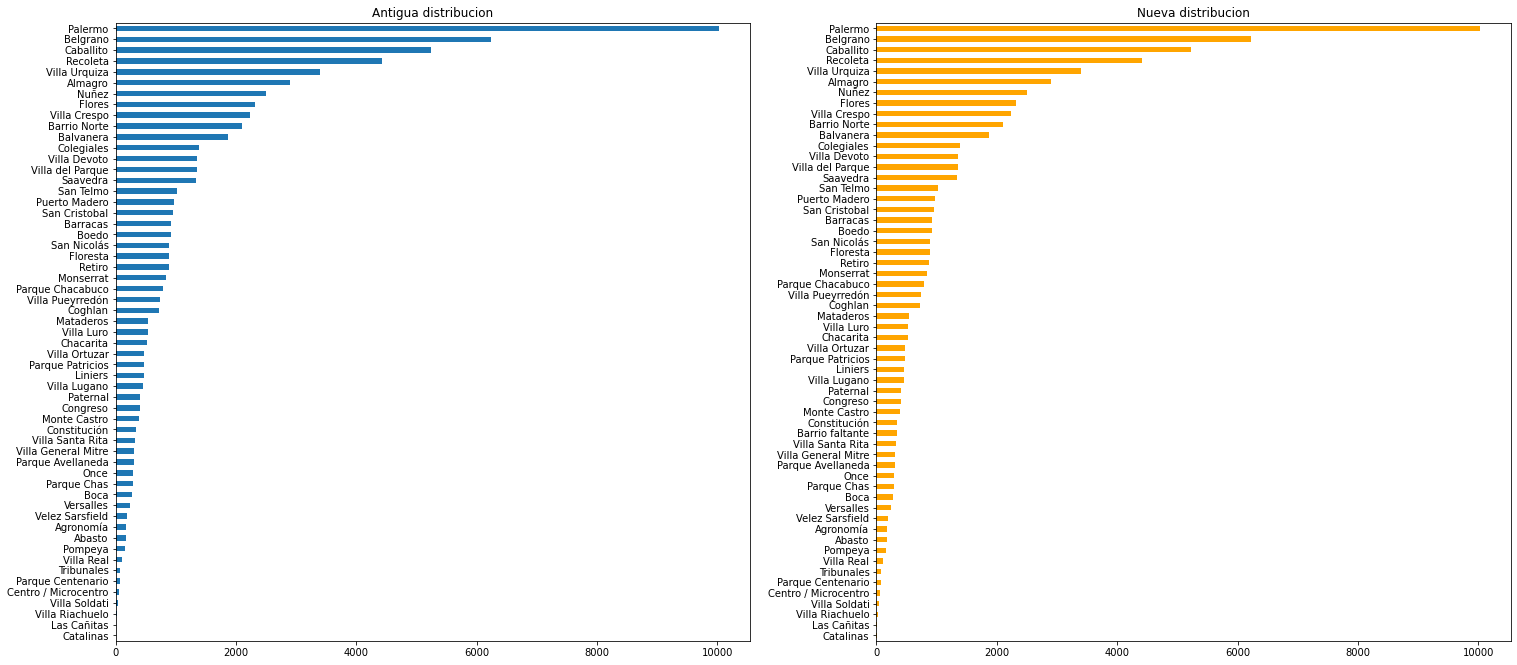

In [ ]:
figure, axes = plt.subplots(figsize=(25, 25))
plt.subplot(221);
plt.title("Antigua distribucion")
df_train["place_l3"].value_counts(ascending=True).plot.barh()
plt.subplot(222);
plt.title("Nueva distribucion")
df_b["place_l3"].value_counts(ascending=True).plot.barh(color = "orange")

##Outiliers

In [ ]:
df_o = df_b.copy()

###Univariada

####Latitud


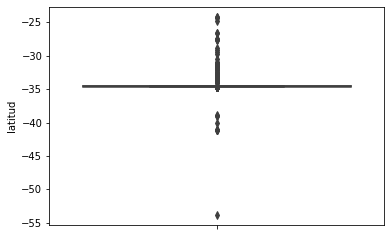

In [ ]:
# Comienzo viendo el boxplot de latitud para ver sus outliers

sns.boxplot(y=df_o["latitud"]);
plt.show()

In [ ]:
#Analizo aquellos outliers que se ven mas severos
df_o[df_o["latitud"] < -36]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
84653,-41.168947,-71.439510,Capital Federal,Barrio faltante,Venta,Casa,9.0,7.0,250.0,250.0,500000.0,USD,Calida y Exclusiva Propiedad en Villa Catedral
324200,-38.940227,-68.073865,Capital Federal,Barrio faltante,Venta,Departamento,3.0,2.0,55.0,55.0,120000.0,USD,DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...
106297,-41.086352,-71.185720,Capital Federal,Barrio faltante,Venta,Departamento,2.0,1.0,53.0,53.0,145000.0,USD,POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...
155333,-41.164123,-71.415420,Capital Federal,Barrio faltante,Venta,Casa,3.0,2.0,-332.9,70.0,380000.0,USD,"HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C..."
457631,-53.788624,-67.718089,Capital Federal,Barrio faltante,Venta,Departamento,3.0,2.0,121.0,100.0,375000.0,USD,Depto 3 ambientes Arboris Las Lomas
106288,-40.131723,-71.299436,Capital Federal,Barrio faltante,Venta,Departamento,2.0,1.0,44.0,44.0,105000.0,USD,"Hermoso departamento en venta, totalmente equi..."
410404,-38.964493,-68.075830,Capital Federal,Barrio faltante,Venta,Casa,7.0,5.0,218.0,218.0,230000.0,USD,CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...
105792,-41.084900,-71.187159,Capital Federal,Barrio faltante,Venta,Departamento,1.0,1.0,53.0,53.0,145000.0,USD,Villa Huapi - Dina Huapi - Río Negro - APTO CR...
208085,-41.085373,-71.185766,Capital Federal,Barrio faltante,Venta,Departamento,2.0,1.0,60.0,50.0,142000.0,USD,Excelente departamento en venta en Dina Huapi ...
10486,-41.163826,-71.438923,Capital Federal,Barrio faltante,Venta,Casa,3.0,3.0,-301.9,100.0,410000.0,USD,BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...


In [ ]:
# Utilizando la informacion de la columna property_title y usando google maps para las longitudes y latitudes
# Me doy cuenta que son apuntan a lugares que no me interesan estudiar, asi que los elimino
df_o.drop(df_o[df_o["latitud"] < -36].index, inplace=True);

In [ ]:
# Analizo el resto de outliers
df_o[df_o["latitud"] > -28]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
32695,-24.770804,-65.400812,Capital Federal,Barrio faltante,Venta,Casa,5.0,4.0,588.0,523.0,1600000.0,USD,Casa en venta en La Berlina Pilará
241662,-26.616670,-54.133330,Capital Federal,Barrio faltante,Venta,Casa,4.0,3.0,230.0,200.0,255000.0,USD,Venta casa barrio cerrado Santa Rita 4 ambie...
173667,-27.631190,-55.496357,Capital Federal,Barrio faltante,Venta,Departamento,4.0,3.0,98.0,88.0,269000.0,USD,Venta departamento 4 amb Vicente Lopez con cochea
324539,-24.372960,-65.027110,Capital Federal,Barrio faltante,Venta,Casa,4.0,3.0,174.0,174.0,150000.0,USD,VENTA CASA COUNTRY EL PARAISO SOBRE 2 LOTES
318763,-27.469213,-58.830635,Capital Federal,Barrio faltante,Venta,Departamento,2.0,1.0,55.0,55.0,125000.0,USD,2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...
248772,-27.469213,-58.830635,Capital Federal,Barrio faltante,Venta,Casa,4.0,1.0,1158.3,220.0,295000.0,USD,HERMOSA CASA Estilo Tradicional - DETALLES UNICOS
405382,-26.616670,-54.133330,Capital Federal,Barrio faltante,Venta,Casa,3.0,2.0,205.0,102.0,125000.0,USD,"Depto Venta, Fincas de San Vicente II, 3 amb"
393811,-24.219827,-64.859137,Capital Federal,Barrio faltante,Venta,Casa,3.0,2.0,1016.0,86.0,145000.0,USD,Venta casa 3 ambientes s/ lote 1016 m2 SAN PEDRO
393806,-24.219827,-64.859137,Capital Federal,Barrio faltante,Venta,Casa,3.0,2.0,538.0,87.0,95000.0,USD,Venta casa 3 ambientes Barrio Pago Chico SAN P...
220851,-27.581620,-56.682310,Capital Federal,Barrio faltante,Venta,Casa,4.0,2.0,105.0,105.0,190000.0,USD,Casa jardín 2 dorm escrit. a 1 cdra Estación


In [ ]:
# Otra vez se tratan de lugares que no me interesan estudiar por lo tanto los elimino
df_o.drop(df_o[df_o["latitud"] > -28].index, inplace=True);

In [ ]:
# Sigo analizando los outliers
df_o[df_o["latitud"] > -31]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
187631,-29.689920,-57.556660,Capital Federal,Barrio faltante,Venta,Departamento,5.0,4.0,158.0,150.0,380000.0,USD,"5 Ambientes, 4 baños, AMENITIES, Talar de Mart..."
141150,-28.880556,-63.978659,Capital Federal,Barrio faltante,Venta,Casa,4.0,3.0,180.0,130.0,195000.0,USD,CASA en entorno privilegiado con parque y pileta.
43776,-29.413454,-66.856458,Capital Federal,Barrio faltante,Venta,Departamento,2.0,1.0,45.0,45.0,50000.0,USD,Departamento VENTA - 1 dormitorio 1 baño - Cas...
312734,-30.988632,-64.492327,Capital Federal,Barrio faltante,Venta,Casa,4.0,3.0,2000.0,230.0,350000.0,USD,Venta Casa 3 Dormitorios - La Cumbre
225660,-29.140755,-59.638836,Capital Federal,Barrio faltante,Venta,Casa,3.0,2.0,110.0,76.0,87000.0,USD,"Venta Casa duplex 3 amb con altillo, patio, c..."
424020,-30.436760,-64.317055,Capital Federal,Barrio faltante,Venta,Casa,6.0,3.0,172.0,112.0,134000.0,USD,Venta Casa en Manzanares Barrio Abierto


In [ ]:
# Mas de lo mismo datos que no me interesan estudiar por lo tanto los elimino
df_o.drop(df_o[df_o["latitud"] > -31].index, inplace=True);

In [ ]:
df_o[df_o["latitud"] > -34]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
9156,-31.390431,-64.179004,Capital Federal,Barrio faltante,Venta,Departamento,1.0,1.0,623.8,38.0,55000.0,USD,Depto en VENTA 1 dormitorio + cochera - Merlo ...
130468,-31.733771,-60.809442,Capital Federal,Barrio faltante,Venta,Casa,3.0,2.0,280.0,280.0,85000.0,USD,VENTA DE CASA QUINTA EN ALTOS DEL SAUCE
102607,-32.966991,-60.634174,Capital Federal,Barrio faltante,Venta,Departamento,3.0,2.0,48.0,48.0,92000.0,USD,Hermoso departamento en zona Abasto.
156989,-33.081030,-68.468140,Capital Federal,Barrio faltante,Venta,Departamento,3.0,2.0,71.0,67.0,93000.0,USD,VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS
130456,-31.421601,-60.333554,Capital Federal,Barrio faltante,Venta,Casa,3.0,4.0,606.3,135.0,170000.0,USD,VENDO HERMOSAS CABAÑAS EN SANTA ROSA DE CALCHINES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169096,-32.840363,-60.807869,Capital Federal,Barrio faltante,Venta,Casa,4.0,3.0,1000.0,180.0,300000.0,USD,Ibarlucea Casa · 180m² · 3 dorm
432801,-31.678900,-63.879640,Capital Federal,Barrio faltante,Venta,Casa,8.0,5.0,507.0,457.0,650000.0,USD,Venta casa en Los Lagartos CC
131209,-31.448986,-60.930366,Capital Federal,Barrio faltante,Venta,Departamento,4.0,2.0,150.0,150.0,200000.0,USD,SE VENDE SEMIPISO DE CATEGORÍA EN EL CENTRO DE...
45536,-32.065926,-64.527838,Capital Federal,Barrio faltante,Venta,Casa,3.0,2.0,307.0,106.0,139000.0,USD,Se Vende Casa Amoblada en Santa Rosa de Calamu...


In [ ]:
# Datos de lugares que no me interesan estudiar por lo tanto los elimino
df_o.drop(df_o[df_o["latitud"] > -34].index, inplace=True);

In [ ]:
df_o[df_o["latitud"] > -34.4]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
57093,-34.009160,-63.924113,Capital Federal,Barrio faltante,Venta,Departamento,2.0,1.0,43.0,40.0,84000.0,USD,Venta Depto 2amb c/balcon a Estrenar Saenz Peña
57086,-34.128668,-63.376624,Capital Federal,Barrio faltante,Venta,Departamento,3.0,2.0,66.0,61.0,145000.0,USD,VENTA DEPTO 3 AMB SAENZ PEÑA A ESTRENAR
57097,-34.128668,-63.376624,Capital Federal,Barrio faltante,Venta,Departamento,2.0,1.0,43.0,40.0,77500.0,USD,Venta Depto 2amb c/balcon oport/ a estr Saenz ...


In [ ]:
df_o.drop(df_o[df_o["latitud"] > -34.4].index, inplace=True);

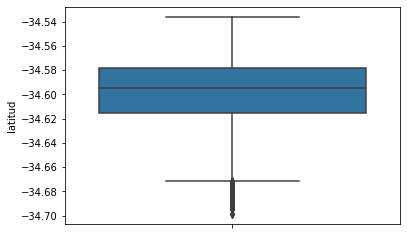

In [ ]:
# Vuelvo a graficar latitud para ver que otros outliers quedan
sns.boxplot(y=df_o["latitud"]);
plt.show()

In [ ]:
# Utilizo otro metodo para detectar outliers 
# por ejemplo z-score modificado 
mediana_peso=np.median(df_o["latitud"])
MAD=np.median(np.absolute(df_o["latitud"]-mediana_peso))

df_o['zm_latitud']= (df_o["latitud"] - mediana_peso)*0.6745/MAD

In [ ]:
# Aquellos zm-latitud mayores a 3.5 se consideran outliers
df_o[df_o["zm_latitud"] > 3.5]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_latitud


In [ ]:
# Aquellos zm-latitud menores a -3.5 se consideran outliers
df_o[df_o["zm_latitud"] < -3.5]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_latitud
119537,-34.693444,-58.470903,Capital Federal,Villa Lugano,Venta,PH,4.0,3.0,115.0,115.0,175000.0,USD,PH - Villa Lugano,-3.598714
132552,-34.692474,-58.475118,Capital Federal,Villa Lugano,Venta,Casa,4.0,3.0,155.0,155.0,295000.0,USD,Casa 4 Amb Con Cochera - Hecha a Nueva - CABA -,-3.563329
395294,-34.693799,-58.475428,Capital Federal,Villa Riachuelo,Venta,Casa,5.0,3.0,235.0,235.0,190000.0,USD,Venta Casa 5 Ambientes Terraza Parrilla V. Lugano,-3.611660
236881,-34.691797,-58.474629,Capital Federal,Villa Lugano,Venta,Casa,8.0,4.0,251.2,258.0,250000.0,USD,Venta de Gran Casa de 4 dormitorios con Cocher...,-3.538641
6981,-34.690775,-58.472361,Capital Federal,Villa Lugano,Venta,Casa,3.0,3.0,300.0,140.0,270000.0,USD,CASA EN VENTA EN VILLA LUGANO,-3.501373
146879,-34.694062,-58.466105,Capital Federal,Villa Riachuelo,Venta,Casa,4.0,3.0,211.0,131.0,154000.0,USD,casa en venta villa riachuelo lugano terreno,-3.621234
42861,-34.691595,-58.464779,Capital Federal,Villa Riachuelo,Venta,Departamento,3.0,2.0,56.0,53.0,75000.0,USD,Venta Departamento 3 ambientes en Villa Riachuelo,-3.531274
90919,-34.693171,-58.468251,Capital Federal,Villa Lugano,Venta,Casa,3.0,2.0,114.0,110.0,110000.0,USD,Casa con local en villa lugano a refaccionar,-3.588743
199571,-34.692057,-58.468237,Capital Federal,Villa Riachuelo,Venta,PH,3.0,2.0,59.0,50.0,95000.0,USD,Venta PH Impecable Villa Riachuelo,-3.548122
338920,-34.691711,-58.466921,Capital Federal,Villa Lugano,Venta,Casa,4.0,3.0,120.0,110.0,159000.0,USD,Casa Villa Lugano 4 ambientes con Garaje,-3.535501


In [ ]:
# Si bien son outliers Villa Riachuelo y Villa Lugano son parte de Capital Federal y por lo tanto los necesito para estudiar
# Verifico que solamente estos dos esten ahi 
df_o[df_o["zm_latitud"] < -3.5]["place_l3"].value_counts()

Villa Lugano       30
Villa Riachuelo    18
Name: place_l3, dtype: int64

In [ ]:
# Termino el analisis de outliers para latitud
df_o.drop(["zm_latitud"], axis=1, inplace=True)

In [ ]:
#Aplico las mismas eliminaciones generales ,que hice en train, sobre test
df_test.drop(df_test[df_test["latitud"] > -34.4].index, inplace=True);
df_test.drop(df_test[df_test["latitud"] < -36].index, inplace=True);

####Longitud

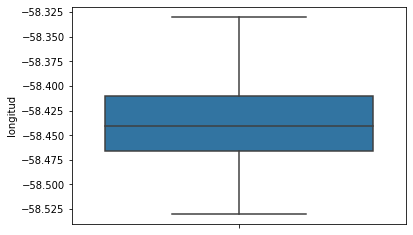

In [ ]:
# Comienzo viendo el boxplot de latitud para detectar outliers
sns.boxplot(y=df_o["longitud"]);
plt.show()

In [ ]:
#A simple vista no se ve ningun outlier utilizo otros metodos para asegurarme como z-score modificado
mediana_peso=np.median(df_o["longitud"])
MAD=np.median(np.absolute(df_o["longitud"]-mediana_peso))

df_o['zm_longitud']= (df_o["longitud"] - mediana_peso)*0.6745/MAD

In [ ]:
df_o[df_o["zm_longitud"] > 3.5]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_longitud


In [ ]:
df_o[df_o["zm_longitud"] < -3.5]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_longitud


In [ ]:
#No hay outliers en longitud por analizar 
df_o.drop(["zm_longitud"], axis=1, inplace=True)

####Property_rooms

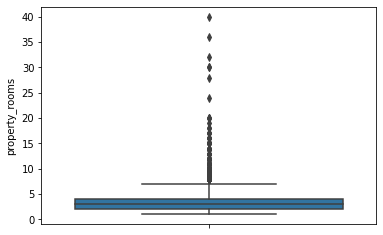

In [ ]:
#Comienzo utilizando boxplot
sns.boxplot(y=df_o["property_rooms"]);
plt.show()

In [ ]:
#Utilizo z-score modificado para ayudarme a detectar cuantos outliers son
mediana_peso=np.median(df_o["property_rooms"])
MAD=np.median(np.absolute(df_o["property_rooms"]-mediana_peso))

df_o['zm_property_rooms']= (df_o["property_rooms"] - mediana_peso)*0.6745/MAD

df_o[df_o['zm_property_rooms'] > 3.5].shape[0]

246

In [ ]:
#Como no son muchos casos, los voy viendo
#Reviso el outlier mas severo y verifico si puedo corregirlo 
df_o[df_o["property_rooms"] > 39]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_rooms
356618,-34.588742,-58.422459,Capital Federal,Palermo,Venta,Departamento,40.0,3.0,75.0,68.0,145000.0,USD,SOLER 4400 - PALERMO - DPTO 4 AMB C/ BALCON AL...,24.9565


In [ ]:
#Utilizando la informacion de la columna property_title, me doy cuenta que se trata de un error, lo corrijo
df_o.loc[df_o.property_rooms > 39, "property_rooms"] /= 10

In [ ]:
#Sigo analizando outliers
df_o[df_o["property_rooms"] > 30]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_rooms
90004,-34.633236,-58.480313,Capital Federal,Floresta,Venta,PH,32.0,32.0,535.0,435.0,300000.0,USD,"Hotel Familiar, 32 Habitaciones",19.5605
147916,-34.572818,-58.423672,Capital Federal,Tribunales,Venta,Departamento,36.0,18.0,1348.0,885.8,1700000.0,USD,Departamento - Tribunales,22.2585


In [ ]:
# Viendo los outliers anteriores me doy cuenta que la tercera fila tiene un error y es que la cantidad de
# property_rooms es mayor al property_surface_covered. Asi que analizo esos casos
df_o[df_o["property_rooms"] >= df_o["property_surface_covered"]].shape[0]

22

In [ ]:
# Como se tratan de errores y son pocos, los elimino
df_o.drop(df_o[df_o["property_rooms"] >= df_o["property_surface_covered"]].index, inplace=True)

In [ ]:
# Analizo otros errores posibles 
df_o[df_o["property_rooms"] == df_o["property_surface_covered"]].shape[0]

0

In [ ]:
df_o[df_o["property_rooms"] == df_o["property_surface_total"]].shape[0]

0

In [ ]:
#Como no hay errores de ese estilo continuo
#Una vez corregido algunos datos elimino aquellos que tengan una z-score modificado mayor a 3.5
df_o.drop(df_o[df_o["zm_property_rooms"] > 3.5].index, inplace=True)

df_o.drop(["zm_property_rooms"], axis=1, inplace=True)

In [ ]:
#Aplico las mismas eliminaciones a dataframe Test

#Elimono aquellos errores de este estilo
df_test.drop(df_test[df_test["property_rooms"] >= df_test["property_surface_covered"]].index, inplace=True)
df_test.drop(df_test[df_test["property_rooms"] == df_test["property_surface_covered"]].index, inplace=True)
df_test.drop(df_test[df_test["property_rooms"] == df_test["property_surface_total"]].index, inplace=True)


mediana_peso=np.median(df_test["property_rooms"])
MAD=np.median(np.absolute(df_test["property_rooms"]-mediana_peso))

df_test['zm_property_rooms']= (df_test["property_rooms"] - mediana_peso)*0.6745/MAD

#Elimino los outliers mayores a 3.5
df_test.drop(df_test[df_test["zm_property_rooms"] > 3.5].index, inplace=True)

df_test.drop(["zm_property_rooms"], axis=1, inplace=True)

####Property_bedrooms

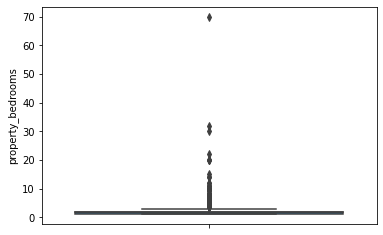

In [ ]:
# Comienzo viendo boxplot
sns.boxplot(y=df_o["property_bedrooms"]);
plt.show()

In [ ]:
#Utilizo z-score modificado para revisar cuantos outliers hay en total
mediana_peso=np.median(df_o["property_bedrooms"])
MAD=np.median(np.absolute(df_o["property_bedrooms"]-mediana_peso))

df_o['zm_property_bedrooms']= (df_o["property_bedrooms"] - mediana_peso)*0.6745/MAD
df_o[df_o["zm_property_bedrooms"] > 3.5].shape[0]

37

In [ ]:
#Como se tratan de pocos outliers los analizo y veo si puedo corregir algun error
df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 20)]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_bedrooms
94998,-34.646632,-58.497902,Capital Federal,Villa Luro,Venta,Departamento,3.0,70.0,78.9,70.0,135000.0,USD,Departamento - Villa Luro,45.866
48279,-34.608645,-58.485619,Capital Federal,Villa del Parque,Venta,Departamento,4.0,32.0,83.0,75.0,189000.0,USD,Departamento 4 ambientes a estrenar en duplex ...,20.235
86014,-34.591110,-58.400685,Capital Federal,Recoleta,Venta,Departamento,4.0,30.0,148.0,138.0,380000.0,USD,Departamento. Recoleta. Balcón terraza. Silenc...,18.886
140832,-34.588454,-58.385257,Capital Federal,Recoleta,Venta,Departamento,5.0,22.0,191.0,144.0,430000.0,USD,Departamento de 2 dormitorios con balcón en ve...,13.490


In [ ]:
#Analizo el property_title para verificar si me brinda alguna informacion
for i in df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 20)]["property_title"].values:
  print(i)

Departamento - Villa Luro
Departamento 4 ambientes a estrenar en duplex de categoría  - Villa del Parque
Departamento. Recoleta. Balcón terraza. Silencioso. Reciclado
Departamento de 2 dormitorios con balcón en venta  - Recoleta


In [ ]:
#Se tratan de errores, los elimino
df_o.drop(df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 20)].index, inplace=True);

In [ ]:
df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 10)]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_bedrooms
183941,-34.618541,-58.391789,Capital Federal,San Cristobal,Venta,PH,8.0,12.0,513.0,446.0,410000.0,USD,VENTA EDIFICIO PH 3 PLANTAS P/SUBDIVIDIR O REM...,6.7450
36421,-34.576061,-58.421289,Capital Federal,Palermo,Venta,Departamento,3.0,20.0,127.0,117.0,650000.0,USD,Departamento - Palermo,12.1410
337147,-34.590721,-58.451636,Capital Federal,Almagro,Venta,Departamento,3.0,20.0,111.0,76.0,245000.0,USD,Excelente y único Departamento en duplex a nue...,12.1410
118501,-34.623056,-58.400937,Capital Federal,San Cristobal,Venta,Casa,3.0,12.0,632.0,432.0,470000.0,USD,"IMPORTANTE CASA DE 10 AMBIENTES CON PATIO , TE...",6.7450
97734,-34.598309,-58.379852,Capital Federal,Retiro,Venta,Departamento,1.0,11.0,22.0,20.0,62000.0,USD,Departamento - Capital Federal,6.0705
421250,-34.646502,-58.438508,Capital Federal,Flores,Venta,Casa,8.0,15.0,264.0,278.0,190000.0,USD,Casa - Flores Sur,8.7685
41088,-34.614573,-58.480650,Capital Federal,Villa del Parque,Venta,Departamento,2.0,11.0,14.0,35.0,95000.0,USD,Departamento 2 ambientes al frente con Balcón ...,6.0705
115342,-34.645539,-58.509067,Capital Federal,Villa Luro,Venta,Casa,3.0,11.0,862.7,795.0,1200000.0,USD,Increible casa de categoria en inmejorable zona!,6.0705
177181,-34.626697,-58.373873,Capital Federal,San Telmo,Venta,Casa,3.0,14.0,2500.0,2500.0,1550000.0,USD,"Casa de 2500 m2, ideal para uso comercial.",8.0940
337831,-34.590721,-58.451636,Capital Federal,Caballito,Venta,Departamento,3.0,20.0,111.0,76.0,245000.0,USD,Excelente y único Departamento en duplex a nue...,12.1410


In [ ]:
#Analizo el property_title para verificar si me brinda alguna informacion
for i in df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 10)]["property_title"].values:
  print(i)

VENTA EDIFICIO PH 3 PLANTAS P/SUBDIVIDIR O REMODEL
Departamento - Palermo
Excelente y único Departamento en duplex a nuevo con gran terraza - Almagro
IMPORTANTE CASA DE 10 AMBIENTES CON PATIO , TERRAZA Y GARAGE
Departamento - Capital Federal
Casa - Flores Sur
Departamento 2 ambientes al frente con Balcón en Villa del Parque
Increible casa de categoria en inmejorable zona! 
Casa de 2500 m2, ideal para uso comercial.
Excelente y único Departamento en duplex a nuevo con gran terraza - Caballito
Casa de 2500 m2, ideal para uso comercial.


In [ ]:
#debido a la falta de informacion, los elimino
df_o.drop(df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 10)].index, inplace=True);

In [ ]:
df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 9)]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_bedrooms
340919,-34.598380,-58.389257,Capital Federal,Barrio Norte,Venta,Casa,3.0,10.0,783.0,714.0,1600000.0,USD,Venta Edificio Restaurado Petit Hotel Año 192...,5.396
112840,-34.619731,-58.377187,Capital Federal,San Telmo,Venta,Casa,3.0,10.0,200.0,200.0,226000.0,USD,PH - San Telmo,5.396
301651,-34.598380,-58.389257,Capital Federal,Barrio Norte,Venta,Casa,3.0,10.0,783.0,714.0,1600000.0,USD,Venta Edificio Restaurado Año 1925 Ex Embajada...,5.396
179150,-34.597831,-58.388162,Capital Federal,Recoleta,Venta,Departamento,3.0,10.0,636.0,636.0,825000.0,USD,Departamento - Recoleta,5.396
6922,-34.623819,-58.371153,Capital Federal,San Telmo,Venta,Casa,3.0,10.0,868.0,750.0,1500000.0,USD,Casa en venta en San Telmo,5.396
77901,-34.598380,-58.389257,Capital Federal,Barrio Norte,Venta,Casa,3.0,10.0,783.0,714.0,1599900.0,USD,Venta Edificio Restaurado Petit Hotel Año 192...,5.396
391275,-34.601903,-58.396956,Capital Federal,Balvanera,Venta,Casa,3.0,10.0,554.0,554.0,990000.0,USD,"(CATEGORIA, DISEÑO Y COMFORT) EN BLOCK 5 DEPTO...",5.396
299459,-34.601903,-58.396956,Capital Federal,Barrio Norte,Venta,Casa,3.0,10.0,554.0,554.0,1300000.0,USD,"(CATEGORIA, DISEÑO Y COMFORT) EN BLOCK 5 DEPTO...",5.396


In [ ]:
#Si bien hay algun que otro error, en su mayoria son datos logicos los elimino por ser outliers (outliers severos todos tienen mas de 5 de zm_score)
df_o.drop(df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 9)].index, inplace=True);

In [ ]:
df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 7)]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_bedrooms
177280,-34.621400,-58.390068,Capital Federal,Constitución,Venta,Casa,3.0,8.0,428.0,295.0,390000.0,USD,"Casa de 11 habitaciones, patios y jardín.",4.0470
6920,-34.583274,-58.437857,Capital Federal,San Telmo,Venta,Casa,3.0,9.0,511.0,380.0,920000.0,USD,CASA VENTA SAN TELMO,4.7215
292159,-34.613152,-58.454014,Capital Federal,Caballito,Venta,PH,8.0,8.0,287.0,243.0,329900.0,USD,VENTA 3 PH JUNTOS EN CABALLITO,4.0470
371576,-34.604930,-58.440416,Capital Federal,Villa Crespo,Venta,Casa,5.0,8.0,540.0,540.0,690000.0,USD,VENTA DE 2 PH EN BLOQUE VILLA CRESPO,4.0470
103915,-34.577180,-58.451264,Capital Federal,Colegiales,Venta,Departamento,6.0,8.0,424.0,324.0,660000.0,USD,DEPARTAMENTOS CON 2 UNIDADES COMPLEMENTARIAS E...,4.0470
426286,-34.567114,-58.441770,Capital Federal,Palermo,Venta,Casa,7.0,8.0,1000.0,900.0,4000000.0,USD,Venta Palermo 2 casas en un doble lote 4 cocheras,4.0470
332190,-34.593634,-58.377164,Capital Federal,Retiro,Venta,Casa,3.0,8.0,1166.0,1485.0,10000000.0,USD,Basavilbaso y Arenales Espectacular casa. Embl...,4.0470
343791,-34.610459,-58.393132,Capital Federal,Balvanera,Venta,Departamento,6.0,8.0,143.0,143.0,135000.0,USD,"antiguo departamento frente al Congreso, 6 amb...",4.0470
241315,-34.629306,-58.465354,Capital Federal,Flores,Venta,Departamento,8.0,8.0,275.0,275.0,219000.0,USD,Piso 275 m2 Rivadavia y Varela,4.0470
387683,-34.538274,-58.329729,Capital Federal,Palermo,Venta,Departamento,8.0,8.0,680.0,680.0,5800000.0,USD,Alquiler en edificio de GRAN categoría muy lum...,4.0470


In [ ]:
# No se encuentran errores, eliminados simplemente por ser outliers y ser pocos
df_o.drop(df_o[(df_o["zm_property_bedrooms"] > 3.5) & (df_o["property_bedrooms"] > 7)].index, inplace=True)
# Verifico si quedan outliers
df_o[df_o["zm_property_bedrooms"] > 3.5].shape[0]

0

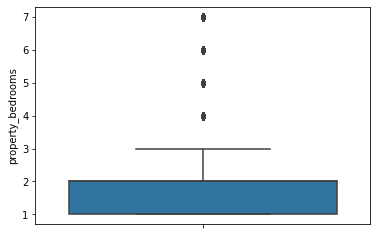

In [ ]:
# Vuelvo a graficar boxplot 
sns.boxplot(y=df_o["property_bedrooms"]);
plt.show()

In [ ]:
#Una vez analizados y eliminados todos los outliers de property_bedrooms elimino zm_property_bedrooms
df_o.drop(["zm_property_bedrooms"], axis=1, inplace=True)

In [ ]:
#Aplico las mismas eliminaciones al test

mediana_peso=np.median(df_test["property_bedrooms"])
MAD=np.median(np.absolute(df_test["property_bedrooms"]-mediana_peso))

df_test['zm_property_bedrooms']= (df_test["property_bedrooms"] - mediana_peso)*0.6745/MAD

#Elimino los outliers 
df_test.drop(df_test[df_test["zm_property_bedrooms"] > 3.5].index, inplace=True)

df_test.drop(["zm_property_bedrooms"], axis=1, inplace=True)

####Property_surface_total

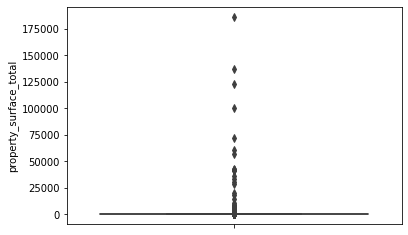

In [ ]:
# Comienzo graficando boxplot
sns.boxplot(y=df_o["property_surface_total"]);
plt.show()

In [ ]:
#Utilizo z-score modificado para revisar cuantos outliers hay en total
mediana_peso=np.median(df_o["property_surface_total"])
MAD=np.median(np.absolute(df_o["property_surface_total"]-mediana_peso))

df_o['zm_property_surface_total']= (df_o["property_surface_total"] - mediana_peso)*0.6745/MAD

df_o[df_o["zm_property_surface_total"] > 3.5].shape[0]

5525

In [ ]:
# Al tratarse de tantos outliers voy a tratar de reducir lo mas que pueda
df_o[df_o["property_surface_total"] > 175000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
1932,-34.637026,-58.426283,Capital Federal,Parque Chacabuco,Venta,Casa,3.0,1.0,186364.7,217000.0,250000.0,USD,EXCEPCIONAL CASA DOS FAMILIAS - Parque Chacabuco,5235.797819


In [ ]:
#Error de datos superficie_total es menor a la superficie cubierta
df_o.drop(df_o[df_o["property_surface_total"] > 175000].index, inplace=True);

df_o[df_o["property_surface_total"] < df_o["property_surface_covered"]]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
81875,-34.590333,-58.422582,Capital Federal,Palermo,Venta,Departamento,1.0,1.0,32.0,37.6,105000.0,USD,Departamento - Palermo Hollywood,-0.927437
171001,-34.574418,-58.419747,Capital Federal,Palermo,Venta,Departamento,4.0,3.0,50.0,180.0,785000.0,USD,Departamento - Palermo Nuevo,-0.421563
209524,-34.635199,-58.401564,Capital Federal,Parque Patricios,Venta,Departamento,2.0,1.0,51.0,55.1,88000.0,USD,Departamento - Parque Patricios,-0.393458
122442,-34.624384,-58.388260,Capital Federal,Constitución,Venta,PH,1.0,1.0,30.0,40.8,65000.0,USD,Alquiler PH - Capital Federal,-0.983646
347272,-34.568743,-58.454778,Capital Federal,Belgrano,Venta,Departamento,2.0,1.0,35.0,36.9,118000.0,USD,Impecable y Divino 2 ambientes con balcón en B...,-0.843125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264524,-34.592562,-58.454836,Capital Federal,Barrio Norte,Venta,Departamento,2.0,1.0,33.0,38.5,85000.0,USD,Departamento - Barrio Norte,-0.899333
89684,-34.677379,-58.476941,Capital Federal,Villa Lugano,Venta,Departamento,3.0,2.0,55.0,60.9,55000.0,USD,Departamento - Villa Lugano,-0.281042
270189,-34.617626,-58.383775,Capital Federal,Constitución,Venta,Departamento,2.0,1.0,46.0,50.5,90000.0,USD,Departamento - Constitución,-0.533979
259747,-34.600906,-58.404580,Capital Federal,Recoleta,Venta,Departamento,2.0,1.0,45.0,47.4,115000.0,USD,Espectacular semipiso de 2 ambientes en Barrio...,-0.562083


In [ ]:
# Al tratarse de errores y no tener la suficiente informacion como para corregirlos decido eliminarlos
df_o.drop(df_o[df_o["property_surface_total"] < df_o["property_surface_covered"]].index, inplace=True);

In [ ]:
# Sigo analizando los outliers
df_o[df_o["property_surface_total"] > 6000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
398069,-34.558309,-58.459923,Capital Federal,Belgrano,Venta,Departamento,2.0,1.0,6470.0,4664.0,149900.0,USD,Venta departamento 2 Ambientes. 2 Baños. 2 Patio,180.007187
442647,-34.622993,-58.455502,Capital Federal,Caballito,Venta,Departamento,3.0,2.0,6836.0,64.0,240000.0,USD,Departamento - Caballito,190.293312
405272,-34.634638,-58.473519,Capital Federal,Floresta,Venta,PH,4.0,3.0,8306.0,7755.0,129000.0,USD,VENTA PH 4 AMBIENTES FLORESTA,231.606437
129214,-34.599421,-58.386867,Capital Federal,Barrio Norte,Venta,Departamento,5.0,3.0,137000.0,135.0,390000.0,USD,Alquiler Divino 5 Amb. - 137 M² en Barrio Norte,3848.444063
459847,-34.628247,-58.437696,Capital Federal,Caballito,Venta,Departamento,4.0,3.0,18096.0,8568.0,324558.0,USD,4 Ambientes Venta de Pozo Caballito Full Ameni...,506.746229
362741,-34.579163,-58.455725,Capital Federal,Colegiales,Venta,Departamento,1.0,1.0,31000.0,26.0,51100.0,USD,Av. Alvarez Thomas 970 - Colegiales - Capital ...,869.402396
459841,-34.627876,-58.437996,Capital Federal,Caballito,Venta,Departamento,3.0,2.0,7153.0,7153.0,177807.0,USD,3 Ambientes Venta de Pozo Caballito Full Ameni...,199.202333
117835,-34.550093,-58.483034,Capital Federal,Saavedra,Venta,Departamento,2.0,1.0,43086.0,40038.0,114000.0,USD,"Venta Departamento 2 amb a Estrenar, Saavedra.",1209.069354
324541,-34.628721,-58.421383,Capital Federal,Boedo,Venta,PH,4.0,3.0,20041.0,139.0,390000.0,USD,PH 4 AMB.C/QUINCHO Y TERRAZA AL FRENTE S/EXPENSAS,561.408833
370918,-34.571747,-58.422612,Capital Federal,Palermo,Venta,Departamento,4.0,3.0,42110.0,307.0,1568760.0,USD,Reventa - Departamento - Palermo Nuevo - Liber...,1181.639688


In [ ]:
# Hay muchos errores pero por la info de property_title se puede arreglarlo dividiendolos por 100
# y volviendolos asi unos datos mas razonables
df_o.loc[df_o.property_surface_total > 6000, "property_surface_total"] /= 100

In [ ]:
df_o[df_o["property_surface_total"] > 4000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
400155,-34.599306,-58.482676,Capital Federal,Villa del Parque,Venta,Departamento,2.0,1.0,4632.0,42.0,129000.0,USD,Departamento Venta Villa del Parque 2 amb 5to ...,128.351729
94789,-34.614279,-58.361092,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,5312.0,4809.0,145000.0,USD,VENTA - EMPRENDIMIENTO DEPARTAMENTO 2 AMBIENTES,147.462562
324150,-34.573775,-58.488545,Capital Federal,Villa Urquiza,Venta,Departamento,2.0,1.0,4053.0,38.0,99000.0,USD,Dpto. 2 ambientes - Agradable ubicación,112.079417
118019,-34.627828,-58.490255,Capital Federal,Villa Devoto,Venta,Departamento,1.0,1.0,4100.0,38.0,67300.0,USD,Departamento Premium de Pozo en VENTA Ubicado ...,113.400312
293109,-34.603310,-58.419520,Capital Federal,Almagro,Venta,Departamento,3.0,2.0,5239.0,3562.8,119000.0,USD,Departamento - Almagro Norte,145.410958
33017,-34.634196,-58.465152,Capital Federal,Flores,Venta,Departamento,1.0,1.0,4428.0,31.0,58552.0,USD,Departamento - Flores,122.618479
233699,-34.606260,-58.452737,Capital Federal,Villa Crespo,Venta,Departamento,2.0,1.0,4224.0,4224.0,100000.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES VILLA CRESPO,116.885229


In [ ]:
#Demasiado errores
#Elijo corregirlos los errores nuevamente  dividiendo por 100
df_o.loc[df_o.property_surface_total > 4000, "property_surface_total"] /= 100

In [ ]:
df_o[df_o["property_surface_total"] > 2000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
195264,-34.554356,-58.458076,Capital Federal,Belgrano,Venta,Departamento,2.0,1.0,2500.0,51.0,164900.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES PISO ALTO BELGRANO,68.433646
187888,-34.606771,-58.502277,Capital Federal,Villa del Parque,Venta,Departamento,2.0,1.0,3425.0,3425.0,75000.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES VILLA DEL PARQUE,94.430000
165965,-34.557754,-58.471497,Capital Federal,Coghlan,Venta,Casa,3.0,1.0,2266.0,2266.0,2950000.0,USD,"Excelente Lote 44,80 x 50,58 - Coghlan",61.857271
406457,-34.563005,-58.453674,Capital Federal,Belgrano,Venta,Departamento,4.0,3.0,2500.0,89.0,369000.0,USD,VENTA DEPARTAMENTO 4 AMB BELGRANO SUCRE COCHERA,68.433646
238510,-34.622357,-58.435193,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,2505.0,41.0,250000.0,USD,VENTA DEPARTAMENTO LOFT 2 AMB CON COCHERA Y BA...,68.574167
35538,-34.573375,-58.480012,Capital Federal,Villa Urquiza,Venta,Departamento,2.0,1.0,3500.0,60.0,169000.0,USD,Departamento dos ambientes Villa Urquiza. Est...,96.537812
314533,-34.554356,-58.458076,Capital Federal,Belgrano,Venta,Departamento,3.0,2.0,2700.0,63.0,244750.0,USD,VENTA DEPARTAMENTO 3 AMBIENTES BELGRANO,74.054479
406499,-34.563005,-58.453674,Capital Federal,Belgrano,Venta,Departamento,1.0,1.0,2500.0,32.0,122000.0,USD,VENTA MONOAMBIENTE DEPARTAMENTO BELGRANO PILETA,68.433646
158638,-34.563371,-58.455471,Capital Federal,Belgrano,Venta,Departamento,1.0,1.0,2500.0,32.0,108000.0,USD,VENTA DEPARTAMENTO MONOAMBIENTE BELGRANO,68.433646
336355,-34.604284,-58.387255,Capital Federal,Monserrat,Venta,Departamento,3.0,2.0,2028.0,68.0,95000.0,USD,DEPARTAMENTO VENTA 3 AMB 68M2 APTO PROFESIONAL,55.168479


In [ ]:
#Demasiados errores
#Los corrijo dividiendo por 10
df_o.loc[df_o.property_surface_total > 2000, "property_surface_total"] /= 100

In [ ]:
df_o[df_o["property_surface_total"] > 1000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
134509,-34.565262,-58.478197,Capital Federal,Villa Urquiza,Venta,Casa,7.0,5.0,1050.00,650.0,850000.0,USD,VENTA CASA 650M2 CUB. JARDIN PILETA 2 COCHERAS,27.682604
406839,-34.611826,-58.516024,Capital Federal,Villa Devoto,Venta,Departamento,3.0,2.0,2000.00,59.0,193400.0,USD,DEPARTAMENTO 3 AMBIENTES CON BALCON VENTA DEVOTO,54.381563
146687,-34.560455,-58.387522,Capital Federal,Belgrano,Venta,Casa,3.0,5.0,1050.00,870.0,3250000.0,USD,Impactante casa estilo INGLÉS - VIRREY DEL PIN...,27.682604
359633,-34.565262,-58.478197,Capital Federal,Villa Urquiza,Venta,Casa,7.0,5.0,1050.00,650.0,880000.0,USD,VENTA CASA 650M2 CUB. JARDIN PILETA 2 COCHERAS,27.682604
449875,-34.565262,-58.478197,Capital Federal,Coghlan,Venta,Casa,7.0,5.0,1050.00,650.0,880000.0,USD,CASA 650M2 CUB. EN VENTA JARDIN PILETA 2 COCH...,27.682604
415959,-34.601449,-58.508924,Capital Federal,Villa Devoto,Venta,Departamento,5.0,4.0,1351.00,910.8,850000.0,USD,PISO - Villa Devoto EXCLUSIVO .,36.141958
398823,-34.624845,-58.431635,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,1870.00,45.0,102000.0,USD,Emprendimiento - Venta 2 amb - CABALLITO SUR,50.728021
112791,-34.549877,-58.443350,Capital Federal,Belgrano,Venta,Casa,6.0,5.0,1500.00,1000.0,4000000.0,USD,Casa - Belgrano,40.329479
409283,-34.599678,-58.436474,Capital Federal,Palermo,Venta,Departamento,3.0,1.0,1697.00,1481.0,2800000.0,USD,VENTA EDIFICIO EN BLOCK -CON IMPORTANTE LOCAL ...,45.866000
134285,-34.565262,-58.478197,Capital Federal,Coghlan,Venta,Casa,7.0,5.0,1050.00,650.0,850000.0,USD,VENTA CASA 650M2 CUB. JARDIN PILETA 2 COCHERAS,27.682604


In [ ]:
# Viendo la columna de property_title ya parecen datos mas razonables
# Vuelvo a calcular su z-score modificado para revisar outliers
mediana_peso=np.median(df_o["property_surface_total"])
MAD=np.median(np.absolute(df_o["property_surface_total"]-mediana_peso))

df_o['zm_property_surface_total']= (df_o["property_surface_total"] - mediana_peso)*0.6745/MAD

In [ ]:
#Analizo outliers severos
df_o[df_o["zm_property_surface_total"] > 30]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
406839,-34.611826,-58.516024,Capital Federal,Villa Devoto,Venta,Departamento,3.0,2.0,2000.0,59.0,193400.0,USD,DEPARTAMENTO 3 AMBIENTES CON BALCON VENTA DEVOTO,54.353458
415959,-34.601449,-58.508924,Capital Federal,Villa Devoto,Venta,Departamento,5.0,4.0,1351.0,910.8,850000.0,USD,PISO - Villa Devoto EXCLUSIVO .,36.113854
398823,-34.624845,-58.431635,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,1870.0,45.0,102000.0,USD,Emprendimiento - Venta 2 amb - CABALLITO SUR,50.699917
112791,-34.549877,-58.443350,Capital Federal,Belgrano,Venta,Casa,6.0,5.0,1500.0,1000.0,4000000.0,USD,Casa - Belgrano,40.301375
409283,-34.599678,-58.436474,Capital Federal,Palermo,Venta,Departamento,3.0,1.0,1697.0,1481.0,2800000.0,USD,VENTA EDIFICIO EN BLOCK -CON IMPORTANTE LOCAL ...,45.837896
129214,-34.599421,-58.386867,Capital Federal,Barrio Norte,Venta,Departamento,5.0,3.0,1370.0,135.0,390000.0,USD,Alquiler Divino 5 Amb. - 137 M² en Barrio Norte,36.647833
363391,-34.614977,-58.362648,Capital Federal,Puerto Madero,Venta,Departamento,5.0,3.0,1503.6,610.0,6500000.0,USD,Departamento en Puerto Madero,40.402550
398822,-34.624845,-58.431635,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,1870.0,45.0,106070.0,USD,Emprendimiento - Venta 2 amb - CABALLITO SUR,50.699917
314739,-34.611826,-58.516024,Capital Federal,Villa Devoto,Venta,Departamento,3.0,2.0,2000.0,62.0,204700.0,USD,VENTA DEPARTAMENTO 3 AMBIENTES CON BALCON DEVOTO,54.353458
119234,-34.637304,-58.357534,Capital Federal,Boca,Venta,Departamento,2.0,1.0,1730.0,47.0,55000.0,USD,PH 2 AMBIENTES AMPLIO - APTO CRÉDITO- LA BOCA,46.765333


In [ ]:
#De nuevo estos datos se pueden solucionar otra vez si se dividen por 10
df_o.loc[df_o.zm_property_surface_total > 30, "property_surface_total"] /= 10

In [ ]:
#Vuelvo a calcular su z-score modificado para revisar outliers
mediana_peso=np.median(df_o["property_surface_total"])
MAD=np.median(np.absolute(df_o["property_surface_total"]-mediana_peso))

df_o['zm_property_surface_total']= (df_o["property_surface_total"] - mediana_peso)*0.6745/MAD

In [ ]:
df_o[df_o["zm_property_surface_total"] > 15]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,zm_property_surface_total
134312,-34.579205,-58.398950,Capital Federal,Palermo,Venta,Casa,3.0,4.0,1000.0,990.0,4500000.0,USD,VENTA en Palermo Chico Barrio Parque Casa esti...,26.249292
196891,-34.577585,-58.400554,Capital Federal,Palermo,Venta,Casa,3.0,1.0,841.9,360.0,3500000.0,USD,Venta casa Barrio Parque 3 dormitorios jardin ...,21.806023
322063,-34.635903,-58.357997,Capital Federal,Boca,Venta,Casa,7.0,6.0,800.0,800.0,830000.0,USD,VENTA DE CASA EN LA BOCA OPORTUNIDAD A CONSTRUIR,20.628458
302107,-34.575012,-58.457444,Capital Federal,Colegiales,Venta,Casa,3.0,1.0,850.0,600.0,650000.0,USD,Casa - Colegiales,22.033667
298469,-34.552764,-58.447947,Capital Federal,Belgrano,Venta,Casa,8.0,7.0,950.0,950.0,2000000.0,USD,Casa - Belgrano Chico,24.844083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359501,-34.593544,-58.420812,Capital Federal,Palermo,Venta,Casa,7.0,4.0,700.0,520.0,1500000.0,USD,VENTA Casa apto profesional con pileta 4o5 do...,17.818042
191125,-34.561145,-58.502361,Capital Federal,Saavedra,Venta,Casa,8.0,5.0,750.0,425.0,750000.0,USD,Hermosa casa en venta - Barrio Parque Saavedra,19.223250
230030,-34.605466,-58.514859,Capital Federal,Villa Devoto,Venta,Casa,5.0,4.0,660.0,550.0,940000.0,USD,Excelente Terreno de de 16 x 43 - de 1110 mts....,16.693875
87395,-34.568008,-58.439480,Capital Federal,Belgrano,Venta,Casa,3.0,5.0,630.0,630.0,2600000.0,USD,Venta casa Belgrano Barrancas estilo francés ...,15.850750


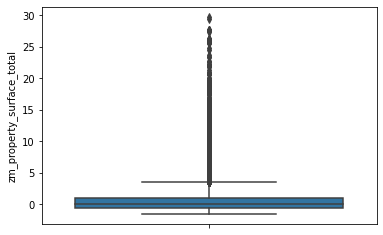

In [ ]:
#Si bien los outliers siguen apareciendo, dejo de analizar los errores porque ya no son tan severos como antes
#Analizo ahora los outliers ya que algunos tienen hasta un z-score modificado de 20
sns.boxplot(y=df_o["zm_property_surface_total"]);
plt.show()

In [ ]:
# Para evitar eliminar todos los outliers elimino solamente los outliers mas severos y para eso utilizo un z-score modificado de 7
df_o.drop(df_o[df_o["zm_property_surface_total"] > 7].index, inplace=True)

df_o.drop(["zm_property_surface_total"], axis=1, inplace=True)

In [ ]:
# Aplico los cambios a test
mediana_peso=np.median(df_test["property_surface_total"])
MAD=np.median(np.absolute(df_test["property_surface_total"]-mediana_peso))

df_test['zm_property_surface_total']= (df_test["property_surface_total"] - mediana_peso)*0.6745/MAD

#Elimino los errores que este dataframe pueda tener
df_test.drop(df_test[df_test["property_surface_total"] < df_test["property_surface_covered"]].index, inplace=True);

# Elimino los outliers severos
df_test.drop(df_test[df_test["zm_property_surface_total"] > 7].index, inplace=True)

df_test.drop(["zm_property_surface_total"], axis=1, inplace=True)

####Property_surface_covered

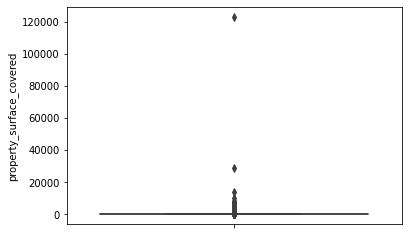

In [ ]:
# Comienzo con boxplot
sns.boxplot(y=df_o["property_surface_covered"]);
plt.show()

In [ ]:
# Analizo el outlier mas severo
df_o[df_o["property_surface_covered"] > 120000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
405324,-34.569963,-58.481658,Capital Federal,Villa Urquiza,Venta,PH,4.0,3.0,123.0,123000.0,165000.0,USD,"VENTA OPORTUNIDAD! PH. IMPECABLE, 4 AMBIENTES"


In [ ]:
#Corrigo el dato
df_o.loc[df_o.property_surface_covered > 120000, "property_surface_covered"] /= 1000

In [ ]:
#Sigo analizando los datos
df_o[df_o["property_surface_covered"] > 10000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
352883,-34.550093,-58.483034,Capital Federal,Saavedra,Venta,Departamento,1.0,1.0,290.64,29064.0,87400.0,USD,VENTA MONOAMBIENTE SAAVEDRA A ESTRENAR
1140,-34.605781,-58.376705,Capital Federal,San Nicolás,Venta,Departamento,3.0,1.0,105.00,10500.0,9900000.0,USD,EDIFICIO A TERMINAR DE 900M2- EXCELENTE UBICAC...
264624,-34.576139,-58.468259,Capital Federal,Villa Ortuzar,Venta,Departamento,5.0,4.0,147.44,13717.0,330000.0,USD,"DEPARTAMENTO EN VENTA en V.Ortúzar, 5 amb. coc..."


In [ ]:
#Corrigo el dato
df_o.loc[df_o.property_surface_covered > 10000, "property_surface_covered"] /= 100

In [ ]:
df_o[df_o["property_surface_covered"] > 2500]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
187888,-34.606771,-58.502277,Capital Federal,Villa del Parque,Venta,Departamento,2.0,1.0,34.25,3425.0,75000.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES VILLA DEL PARQUE
398069,-34.558309,-58.459923,Capital Federal,Belgrano,Venta,Departamento,2.0,1.0,64.70,4664.0,149900.0,USD,Venta departamento 2 Ambientes. 2 Baños. 2 Patio
94789,-34.614279,-58.361092,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,53.12,4809.0,145000.0,USD,VENTA - EMPRENDIMIENTO DEPARTAMENTO 2 AMBIENTES
405272,-34.634638,-58.473519,Capital Federal,Floresta,Venta,PH,4.0,3.0,83.06,7755.0,129000.0,USD,VENTA PH 4 AMBIENTES FLORESTA
459847,-34.628247,-58.437696,Capital Federal,Caballito,Venta,Departamento,4.0,3.0,180.96,8568.0,324558.0,USD,4 Ambientes Venta de Pozo Caballito Full Ameni...
459841,-34.627876,-58.437996,Capital Federal,Caballito,Venta,Departamento,3.0,2.0,71.53,7153.0,177807.0,USD,3 Ambientes Venta de Pozo Caballito Full Ameni...
293109,-34.603310,-58.419520,Capital Federal,Almagro,Venta,Departamento,3.0,2.0,52.39,3562.8,119000.0,USD,Departamento - Almagro Norte
459849,-34.628282,-58.437803,Capital Federal,Caballito,Venta,Departamento,3.0,2.0,77.20,5970.0,167894.0,USD,3 Ambientes Venta de Pozo Caballito Full Ameni...
311702,-34.609829,-58.385083,Capital Federal,Monserrat,Venta,Departamento,2.0,1.0,39.39,3939.0,64000.0,USD,Dpto de 2 Amb - Monserrat - Grupo Electrogeno
233699,-34.606260,-58.452737,Capital Federal,Villa Crespo,Venta,Departamento,2.0,1.0,42.24,4224.0,100000.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES VILLA CRESPO


In [ ]:
#Corrigo dicho datos
df_o.loc[df_o.property_surface_covered > 25000, "property_surface_covered"] /= 100

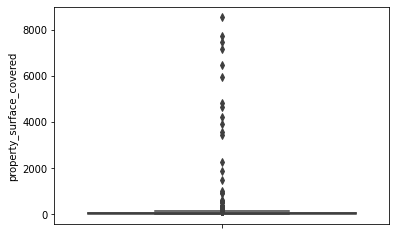

In [ ]:
sns.boxplot(y=df_o["property_surface_covered"]);
plt.show()

In [ ]:
df_o[df_o["property_surface_covered"] > 2000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
187888,-34.606771,-58.502277,Capital Federal,Villa del Parque,Venta,Departamento,2.0,1.0,34.25,3425.0,75000.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES VILLA DEL PARQUE
165965,-34.557754,-58.471497,Capital Federal,Coghlan,Venta,Casa,3.0,1.0,22.66,2266.0,2950000.0,USD,"Excelente Lote 44,80 x 50,58 - Coghlan"
398069,-34.558309,-58.459923,Capital Federal,Belgrano,Venta,Departamento,2.0,1.0,64.70,4664.0,149900.0,USD,Venta departamento 2 Ambientes. 2 Baños. 2 Patio
94789,-34.614279,-58.361092,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,53.12,4809.0,145000.0,USD,VENTA - EMPRENDIMIENTO DEPARTAMENTO 2 AMBIENTES
405272,-34.634638,-58.473519,Capital Federal,Floresta,Venta,PH,4.0,3.0,83.06,7755.0,129000.0,USD,VENTA PH 4 AMBIENTES FLORESTA
459847,-34.628247,-58.437696,Capital Federal,Caballito,Venta,Departamento,4.0,3.0,180.96,8568.0,324558.0,USD,4 Ambientes Venta de Pozo Caballito Full Ameni...
459841,-34.627876,-58.437996,Capital Federal,Caballito,Venta,Departamento,3.0,2.0,71.53,7153.0,177807.0,USD,3 Ambientes Venta de Pozo Caballito Full Ameni...
293109,-34.603310,-58.419520,Capital Federal,Almagro,Venta,Departamento,3.0,2.0,52.39,3562.8,119000.0,USD,Departamento - Almagro Norte
459849,-34.628282,-58.437803,Capital Federal,Caballito,Venta,Departamento,3.0,2.0,77.20,5970.0,167894.0,USD,3 Ambientes Venta de Pozo Caballito Full Ameni...
311702,-34.609829,-58.385083,Capital Federal,Monserrat,Venta,Departamento,2.0,1.0,39.39,3939.0,64000.0,USD,Dpto de 2 Amb - Monserrat - Grupo Electrogeno


In [ ]:
# Los vuelvo a corregir
df_o.loc[df_o.property_surface_covered > 2000, "property_surface_covered"] /= 100

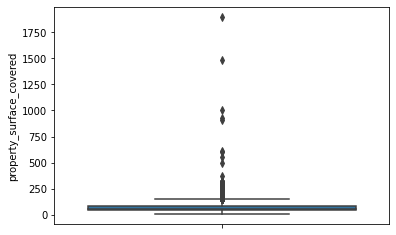

In [ ]:
sns.boxplot(y=df_o["property_surface_covered"]);
plt.show()

In [ ]:
df_o[df_o["property_surface_covered"] > 750]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
415959,-34.601449,-58.508924,Capital Federal,Villa Devoto,Venta,Departamento,5.0,4.0,135.1,910.8,850000.0,USD,PISO - Villa Devoto EXCLUSIVO .
112791,-34.549877,-58.443350,Capital Federal,Belgrano,Venta,Casa,6.0,5.0,150.0,1000.0,4000000.0,USD,Casa - Belgrano
409283,-34.599678,-58.436474,Capital Federal,Palermo,Venta,Departamento,3.0,1.0,169.7,1481.0,2800000.0,USD,VENTA EDIFICIO EN BLOCK -CON IMPORTANTE LOCAL ...
264972,-34.613827,-58.373096,Capital Federal,San Telmo,Venta,Casa,3.0,1.0,199.3,1900.0,1150000.0,USD,Casa - San Telmo
400814,-34.628247,-58.484411,Capital Federal,Floresta,Venta,Casa,4.0,3.0,135.0,924.7,385000.0,USD,Casa - Floresta


In [ ]:
df_o.loc[df_o.property_surface_covered > 750, "property_surface_covered"] /= 10

In [ ]:
df_o[df_o["property_surface_covered"] > 350]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
363391,-34.614977,-58.362648,Capital Federal,Puerto Madero,Venta,Departamento,5.0,3.0,150.36,610.0,6500000.0,USD,Departamento en Puerto Madero
348199,-34.579117,-58.442398,Capital Federal,Barrio faltante,Venta,Casa,3.0,4.0,125.00,549.0,900000.0,USD,Barrio Nautico 3-4 dormitorios 3 en suite amar...
101456,-34.574623,-58.452764,Capital Federal,Barrio faltante,Venta,Casa,3.0,6.0,200.00,374.0,700000.0,USD,ESPECTACULAR CASA EN IBARLUCEA
332516,-34.553399,-58.444800,Capital Federal,Belgrano,Venta,Casa,7.0,6.0,120.00,600.0,1780000.0,USD,Casa - Belgrano
309009,-34.566444,-58.435801,Capital Federal,Barrio faltante,Venta,Casa,3.0,6.0,22.00,500.0,1500000.0,USD,EXCELENTE CHALET EN DOS PLANTAS CON VISTA AL LAGO


In [ ]:
#Corrijo los errores encontrados
df_o.loc[df_o.property_surface_covered > 350, "property_surface_covered"] /= 10

#Verifico cuantos son los errores de este estilo
df_o[df_o["property_surface_covered"] > df_o["property_surface_total"]].shape[0]

18

In [ ]:
df_o[df_o["property_surface_covered"] > df_o["property_surface_total"]]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
195264,-34.554356,-58.458076,Capital Federal,Belgrano,Venta,Departamento,2.0,1.0,25.00,51.0,164900.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES PISO ALTO BELGRANO
406457,-34.563005,-58.453674,Capital Federal,Belgrano,Venta,Departamento,4.0,3.0,25.00,89.0,369000.0,USD,VENTA DEPARTAMENTO 4 AMB BELGRANO SUCRE COCHERA
238510,-34.622357,-58.435193,Capital Federal,Caballito,Venta,Departamento,2.0,1.0,25.05,41.0,250000.0,USD,VENTA DEPARTAMENTO LOFT 2 AMB CON COCHERA Y BA...
35538,-34.573375,-58.480012,Capital Federal,Villa Urquiza,Venta,Departamento,2.0,1.0,35.00,60.0,169000.0,USD,Departamento dos ambientes Villa Urquiza. Est...
314533,-34.554356,-58.458076,Capital Federal,Belgrano,Venta,Departamento,3.0,2.0,27.00,63.0,244750.0,USD,VENTA DEPARTAMENTO 3 AMBIENTES BELGRANO
406499,-34.563005,-58.453674,Capital Federal,Belgrano,Venta,Departamento,1.0,1.0,25.00,32.0,122000.0,USD,VENTA MONOAMBIENTE DEPARTAMENTO BELGRANO PILETA
158638,-34.563371,-58.455471,Capital Federal,Belgrano,Venta,Departamento,1.0,1.0,25.00,32.0,108000.0,USD,VENTA DEPARTAMENTO MONOAMBIENTE BELGRANO
336355,-34.604284,-58.387255,Capital Federal,Monserrat,Venta,Departamento,3.0,2.0,20.28,68.0,95000.0,USD,DEPARTAMENTO VENTA 3 AMB 68M2 APTO PROFESIONAL
2352,-34.584521,-58.424260,Capital Federal,Palermo,Venta,Departamento,2.0,1.0,20.32,37.0,87000.0,USD,Departamento/Venta/2 Ambientes/Excelente/Palermo
314539,-34.554356,-58.458076,Capital Federal,Belgrano,Venta,Departamento,2.0,1.0,25.00,51.0,181990.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES BALCON EN BELGRANO


In [ ]:
# A falta de informacion decido eliminarlos
df_o.drop(df_o[df_o["property_surface_covered"] > df_o["property_surface_total"]].index, inplace=True)

In [ ]:
df_o[df_o["property_surface_covered"] > 300]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
189692,-34.571747,-58.422612,Capital Federal,Palermo,Venta,Departamento,4.0,3.0,309.0,309.0,1600000.0,USD,Espectacular 4 ambientes en Av. del Libertador...
161090,-34.555301,-58.442094,Capital Federal,Belgrano,Venta,Casa,6.0,4.0,309.0,309.0,890000.0,USD,Importante casa en Belgrano Chico de 4 dormito...
383235,-34.583762,-58.435542,Capital Federal,Barrio Norte,Venta,Departamento,5.0,3.0,310.0,310.0,980000.0,USD,RETASADO VENTA: Se escuchan ofertas PISO altur...
136787,-34.640103,-58.445925,Capital Federal,Flores,Venta,PH,8.0,5.0,303.0,303.0,320000.0,USD,PH - Flores
57886,-34.592703,-58.388273,Capital Federal,Recoleta,Venta,Departamento,6.0,4.0,315.0,315.0,1190000.0,USD,Departamento - Recoleta
375377,-34.580555,-58.405059,Capital Federal,Palermo,Venta,Departamento,7.0,4.0,305.0,305.0,1200000.0,USD,Departamento de semipiso con Balcón en Venta -...
46278,-34.579003,-58.424291,Capital Federal,Nuñez,Venta,Departamento,5.0,4.0,314.0,314.0,1490000.0,USD,Oportunidad única!!! Chateau Libertador - 314 ...
389009,-34.640103,-58.445925,Capital Federal,Flores,Venta,PH,8.0,2.0,303.0,303.0,340000.0,USD,PH - Flores
125905,-34.547752,-58.465639,Capital Federal,Nuñez,Venta,Casa,7.0,4.0,310.0,310.0,860000.0,USD,Venta Casa 7 ambientes jardín pileta parrilla ...
151927,-34.573599,-58.421484,Capital Federal,Palermo,Venta,Departamento,7.0,3.0,310.0,310.0,1150000.0,USD,VENTA 310 M2 BALCON 2 COCH SEGURIDAD AMENITIES


In [ ]:
# Por ultimo analizo utilizando z-score y cuantos outliers severos hay
mediana_peso=np.median(df_o["property_surface_covered"])
MAD=np.median(np.absolute(df_o["property_surface_covered"]-mediana_peso))

df_o['zm_property_surface_covered']= (df_o["property_surface_covered"] - mediana_peso)*0.6745/MAD

df_o[df_o["zm_property_surface_covered"] > 7].shape[0]

433

In [ ]:
# Como no son tantos decido eliminarlos
df_o.drop(df_o[df_o["zm_property_surface_covered"]> 7].index, inplace=True)
# No se mas detectan errores graves y los outliers que estan se ven razonables, no elimino los outliers ya que se perderia demasiada informacion
df_o.drop(["zm_property_surface_covered"], axis=1, inplace=True)

In [ ]:
#Aplico los cambios realizados tambien al dataframe de test

#Elimino los errores
df_test.drop(df_test[df_test["property_surface_covered"] > df_test["property_surface_total"]].index, inplace=True)

mediana_peso=np.median(df_test["property_surface_covered"])
MAD=np.median(np.absolute(df_test["property_surface_covered"]-mediana_peso))

df_test['zm_property_surface_covered']= (df_test["property_surface_covered"] - mediana_peso)*0.6745/MAD
#Elimino los outliers demasiados severos
df_test.drop(df_test[df_test["zm_property_surface_covered"]> 7].index, inplace=True)

df_test.drop(["zm_property_surface_covered"], axis=1, inplace=True)

####Property_price

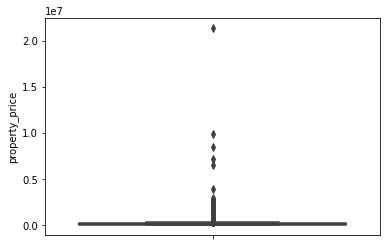

In [ ]:
# Comienzo con boxplot
sns.boxplot(y=df_o["property_price"]);
plt.show()

In [ ]:
df_o[df_o["property_price"] > 10000000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
60073,-34.616044,-58.458621,Capital Federal,Caballito,Venta,Departamento,3.0,1.0,68.0,64.0,21400000.0,USD,Departamento venta


In [ ]:
#No parece un dato erroneo, pero es un dato que esta demasiado alejado del resto, por esa razon lo elimino
df_o.drop(df_o[df_o["property_price"] > 10000000].index, inplace=True);

In [ ]:
df_o[df_o["property_price"] > 5000000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
363391,-34.614977,-58.362648,Capital Federal,Puerto Madero,Venta,Departamento,5.0,3.0,150.36,61.0,6500000.0,USD,Departamento en Puerto Madero
156777,-34.608300,-58.371200,Capital Federal,Monserrat,Venta,Casa,3.0,2.0,225.00,93.0,8500000.0,USD,Oportunidad al Costo! Venta Preciosa Casa a Es...
1140,-34.605781,-58.376705,Capital Federal,San Nicolás,Venta,Departamento,3.0,1.0,105.00,105.0,9900000.0,USD,EDIFICIO A TERMINAR DE 900M2- EXCELENTE UBICAC...
306829,-34.616918,-58.359927,Capital Federal,Puerto Madero,Venta,Departamento,3.0,2.0,128.00,118.0,7149999.0,USD,Departamento - Puerto Madero


In [ ]:
#Son propiedades que no destacan por sus property_rooms o property_bedrooms o por alguna de sus property_surface y estan demasiado alejadas de las demas
#Por esas razones sospecho y procedo a dividirlas por 10 para que parezcan mas razonables
df_o.loc[df_o.property_price > 5000000, "property_price"] /= 10

In [ ]:
# Veo mas outliers
df_o[df_o["property_price"] > 400000]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
377901,-34.588119,-58.388227,Capital Federal,Recoleta,Venta,Departamento,3.0,2.0,87.0,87.0,430000.0,USD,Departamento en Versailles Palace!
66805,-34.594001,-58.408596,Capital Federal,Barrio Norte,Venta,Departamento,5.0,4.0,174.0,174.0,425000.0,USD,1 - Aguero 1300
318910,-34.573333,-58.421634,Capital Federal,Palermo,Venta,Departamento,3.0,2.0,110.0,100.0,550000.0,USD,ESPECTACULAR 3 ambientes con dependencia EN To...
307877,-34.587568,-58.444128,Capital Federal,Belgrano,Venta,Departamento,5.0,5.0,192.0,182.0,585000.0,USD,EXCELENTE PISO 5 AMBIENTES EN BELGRANO
229171,-34.592048,-58.392022,Capital Federal,Recoleta,Venta,Departamento,4.0,3.0,182.0,182.0,495000.0,USD,SEMIP C/DEP AV. CALLAO Y AV. LAS HERAS - V/ABI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73549,-34.551935,-58.442412,Capital Federal,Belgrano,Venta,Departamento,4.0,3.0,138.0,127.0,695000.0,USD,Departamento en Venta de 4 ambientes en Belgra...
219747,-34.594622,-58.390134,Capital Federal,Barrio Norte,Venta,Departamento,5.0,3.0,170.0,170.0,460000.0,USD,Departamento - Barrio Norte
17172,-34.594139,-58.408773,Capital Federal,Barrio Norte,Venta,Departamento,5.0,5.0,174.0,158.0,550000.0,USD,EXCELENTE 5 AMBIENTES CON DEPENDECIA Y COCHERA...
141135,-34.631387,-58.429794,Capital Federal,Parque Chacabuco,Venta,PH,6.0,5.0,246.0,159.0,479900.0,USD,VENTA PH 6 AMBIENTES EN DOS PLANTAS PQUE CHACA...


In [ ]:
# Debido a falta de informacion y conocimiento decido dejar el analisis hasta aca
# Utilizo z-score modificado para eliminar aquellos outliers severos
mediana_peso=np.median(df_o["property_price"])
MAD=np.median(np.absolute(df_o["property_price"]-mediana_peso))

df_o['zm_property_price']= (df_o["property_price"] - mediana_peso)*0.6745/MAD

In [ ]:
#Utilizo z-score modificado para eliminar todos los outliers severos
df_o.drop(df_o[df_o["zm_property_price"] > 7].index, inplace=True);

df_o.drop(["zm_property_price"], axis=1, inplace=True)

In [ ]:
#Aplico los cambios tambien al dataframe de test
df_test.drop(df_test[df_test["property_price"] > 10000000].index, inplace=True);

mediana_peso=np.median(df_test["property_price"])
MAD=np.median(np.absolute(df_test["property_price"]-mediana_peso))

df_test['zm_property_price']= (df_test["property_price"] - mediana_peso)*0.6745/MAD


df_test.drop(df_test[df_test["zm_property_price"] > 7].index, inplace=True);

df_test.drop(["zm_property_price"], axis=1, inplace=True)

###Multivariada

In [ ]:
#Utilizo isolationForest para detectar Outiliers multivariados
from sklearn.ensemble import IsolationForest;

X = df_o[["latitud", "longitud","property_rooms", "property_bedrooms", "property_surface_total", "property_surface_covered", "property_price"]]

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=7, 
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(X)
df_o['outlier_label']=pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df_o.outlier_label.value_counts()

 1    59960
-1     3154
Name: outlier_label, dtype: int64

In [ ]:
#Demasiado outliers multivariados, por el momento se lo deja, ya que el analizarlos a todos demoraria demasiado.

In [ ]:
#Dibujo de los outliers multivariados
#Comentado para que no se ejecute, porque demora 
#sns.pairplot(df_o,vars=X, hue="outlier_label", palette="Spectral")

####Analizar la relacion entre precio de venta y metros de la superficie
####¿Hay valores que no se detectaron previamente?

In [ ]:
X = df_o[["property_surface_total", "property_price"]]

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

pred = iforest.fit_predict(X)
df_o['outlier_label']=pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


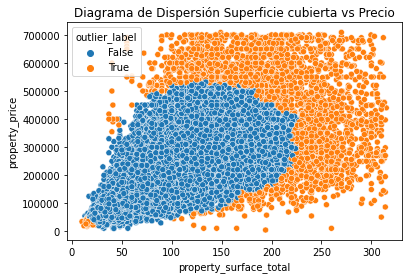

In [ ]:
color = (df_o["outlier_label"] == -1)

sns.scatterplot(x= df_o["property_surface_total"],y = df_o["property_price"],hue=color)
plt.title('Diagrama de Dispersión Superficie cubierta vs Precio')
plt.show()

In [ ]:
#Z-Score Modificado para property_surface_total
mediana_peso=np.median(df_o["property_surface_total"])
MAD=np.median(np.absolute(df_o["property_surface_total"]-mediana_peso))

df_o['zm_property_surface_total']= (df_o["property_surface_total"] - mediana_peso)*0.6745/MAD

#Z-Score Modificado para property_price
mediana_peso=np.median(df_o["property_price"])
MAD=np.median(np.absolute(df_o["property_price"]-mediana_peso))

df_o['zm_property_price']= (df_o["property_price"] - mediana_peso)*0.6745/MAD

In [ ]:
df_o[(df_o["outlier_label"] == -1) & (df_o["zm_property_price"] > -3.5) &(df_o["zm_property_price"] < 3.5) & (df_o["zm_property_surface_total"] > -3.5) & (df_o["zm_property_surface_total"] < 3.5)]

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,outlier_label,zm_property_surface_total,zm_property_price
233024,-34.597404,-58.423818,Capital Federal,Palermo,Venta,Departamento,1.0,1.0,21.0,21.0,35000.0,USD,Monoambiente Studio - Palermo - PREVENTA,-1,-1.318341,-1.336029
224088,-34.655638,-58.388676,Capital Federal,Barracas,Venta,Casa,4.0,2.0,160.0,105.0,95000.0,USD,EN VENTA CASA DE ESTILO A REFACCIONAR BARRACAS,-1,2.943273,-0.557760
135240,-34.601892,-58.459462,Capital Federal,Paternal,Venta,Departamento,1.0,1.0,20.0,20.0,43000.0,USD,DEPARTAMENTO MONOAMBIENTE EN PATERNAL!!,-1,-1.349000,-1.232260
15933,-34.663215,-58.506020,Capital Federal,Mataderos,Venta,PH,5.0,4.0,163.0,112.0,105000.0,USD,PH 5 AMBIENTES PLANTA BAJA CON TERRAZA PROPIA,-1,3.035250,-0.428048
277759,-34.629891,-58.385549,Capital Federal,Constitución,Venta,Departamento,1.0,1.0,18.0,18.0,28000.0,USD,Venta Monoambiente Constitución,-1,-1.410318,-1.426827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323183,-34.592467,-58.445158,Capital Federal,Villa Crespo,Venta,Departamento,1.0,1.0,122.0,122.0,22000.0,USD,OPORTUNIDAD MICRODEPARTAMENTOS EN FIDEICOMISO-...,-1,1.778227,-1.504654
439694,-34.646635,-58.428592,Capital Federal,Pompeya,Venta,PH,4.0,1.0,167.0,100.0,89000.0,USD,"PH EN VENTA 3 AMB CON PATIO, QUINCHO Y COCHERA",-1,3.157886,-0.635587
447247,-34.643294,-58.418631,Capital Federal,Parque Patricios,Venta,Departamento,1.0,1.0,16.0,16.0,35000.0,USD,Departamento - Parque Patricios,-1,-1.471636,-1.336029
165397,-34.615255,-58.363220,Capital Federal,Puerto Madero,Venta,Departamento,1.0,1.0,37.0,31.0,400000.0,USD,ALQUILER SLS PUERTO MADERO 2 AMBIENTES 120 mt...,-1,-0.827795,3.398442


In [ ]:
#Si, existen 203 casos donde antes no eran outliers pero ahora utilizando multivariado si lo son

In [ ]:
df_o.drop(["zm_property_price", "zm_property_surface_total", "outlier_label"], axis=1, inplace=True)

## Reducción de dimensionalidad

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Genero un nuevo dataset seleccionando sólo las columnas numéricas del dataset ya preprocesado
cols_num = ['latitud','longitud','property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price']
df_num = df_o[cols_num].copy()

In [ ]:
x = df_o.loc[:, cols_num].values
x = StandardScaler().fit_transform(x)

In [ ]:
#Con 0 < n_componentes < 1 defino el numero de componentes tal que la varianza explicada sea superior a dicho n_componentes
pca = PCA(n_components=0.95)
x_transformada = pca.fit_transform(x)
x_transformada.shape

(63114, 5)

In [ ]:
#El nuevo conjunto redimensionado tiene 5 componentes principales
df_pca = pd.DataFrame(data = x_transformada, columns = ['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5'])

In [ ]:
pca.explained_variance_ratio_

array([0.58227385, 0.16790171, 0.13327961, 0.06389542, 0.03010682])

In [ ]:
pca.get_covariance()

array([[ 1.00001592e+00, -1.51590905e-01, -6.17203135e-02,
        -5.90495929e-02, -2.60492624e-02, -1.45865392e-02,
         2.12371253e-01],
       [-1.51590905e-01,  1.00004446e+00, -2.11661181e-02,
        -1.66973102e-02, -6.29336555e-02,  4.10785843e-04,
         5.67857776e-02],
       [-6.17203135e-02, -2.11661181e-02,  9.91440711e-01,
         9.12034634e-01,  7.67973541e-01,  8.04092732e-01,
         6.12910307e-01],
       [-5.90495929e-02, -1.66973102e-02,  9.12034634e-01,
         9.92397537e-01,  7.44228544e-01,  7.83522163e-01,
         5.96296745e-01],
       [-2.60492624e-02, -6.29336555e-02,  7.67973541e-01,
         7.44228544e-01,  1.00637610e+00,  9.23030274e-01,
         7.44643934e-01],
       [-1.45865392e-02,  4.10785843e-04,  8.04092732e-01,
         7.83522163e-01,  9.23030274e-01,  1.00974164e+00,
         7.76608293e-01],
       [ 2.12371253e-01,  5.67857776e-02,  6.12910307e-01,
         5.96296745e-01,  7.44643934e-01,  7.76608293e-01,
         1.0000945

In [ ]:
#Concateno el feature property_type al nuevo dataset, para graficar las distribuciones
property_type=pd.DataFrame((np.column_stack(df_o['property_type'])).tolist()).T
df_pca_graf = pd.concat([df_pca, property_type], axis = 1)
df_pca_graf.columns= ['cp_1', 'cp_2','cp_3','cp_4','cp_5','property_type']
df_o.shape

(63114, 13)

In [ ]:
df_pca_graf.head(5)

,cp_1,cp_2,cp_3,cp_4,cp_5,property_type
0,-0.847756,-1.686885,-0.023801,-0.455189,-0.082135,Departamento
1,-2.357166,1.117415,1.356714,-0.786067,-0.371724,Departamento
2,-1.674166,-0.367175,0.235480,0.021022,-0.014827,Departamento
3,-1.638240,-0.474696,-1.005665,-0.469292,0.092526,Departamento
4,0.349185,-0.300509,-1.325668,-1.050306,0.171560,Departamento


In [ ]:
#Categorizo los tipos de propiedad numericamente
df_pca_graf.loc[df_pca_graf.property_type == 'Casa', 'property_type'] = 0
df_pca_graf.loc[df_pca_graf.property_type == 'Departamento', 'property_type'] = 1
df_pca_graf.loc[df_pca_graf.property_type == 'PH', 'property_type'] = 2

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.58227385, 0.75017556, 0.88345517, 0.94735059, 0.9774574 ])

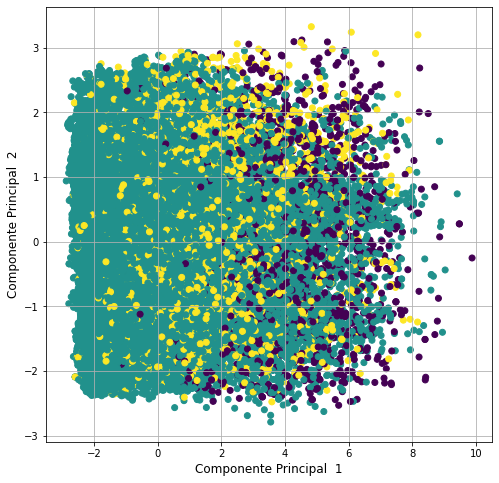

In [ ]:
#Grafico la dos primeras componentes principales, para observar la distribución el R2, coloreando en los 3 tipos
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(x=df_pca_graf['cp_1'], y=df_pca_graf['cp_2'], c=df_pca_graf['property_type'])
ax.set_xlabel('Componente Principal  1', fontsize = 12)
ax.set_ylabel('Componente Principal  2', fontsize = 12)
ax.grid()
plt.show()

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
print(varianza_explicada)
print(varianza_explicada.cumsum())

[0.58227385 0.16790171 0.13327961 0.06389542 0.03010682]
[0.58227385 0.75017556 0.88345517 0.94735059 0.9774574 ]


In [ ]:
pca.get_covariance()

array([[ 1.00001592e+00, -1.51590905e-01, -6.17203135e-02,
        -5.90495929e-02, -2.60492624e-02, -1.45865392e-02,
         2.12371253e-01],
       [-1.51590905e-01,  1.00004446e+00, -2.11661181e-02,
        -1.66973102e-02, -6.29336555e-02,  4.10785843e-04,
         5.67857776e-02],
       [-6.17203135e-02, -2.11661181e-02,  9.91440711e-01,
         9.12034634e-01,  7.67973541e-01,  8.04092732e-01,
         6.12910307e-01],
       [-5.90495929e-02, -1.66973102e-02,  9.12034634e-01,
         9.92397537e-01,  7.44228544e-01,  7.83522163e-01,
         5.96296745e-01],
       [-2.60492624e-02, -6.29336555e-02,  7.67973541e-01,
         7.44228544e-01,  1.00637610e+00,  9.23030274e-01,
         7.44643934e-01],
       [-1.45865392e-02,  4.10785843e-04,  8.04092732e-01,
         7.83522163e-01,  9.23030274e-01,  1.00974164e+00,
         7.76608293e-01],
       [ 2.12371253e-01,  5.67857776e-02,  6.12910307e-01,
         5.96296745e-01,  7.44643934e-01,  7.76608293e-01,
         1.0000945

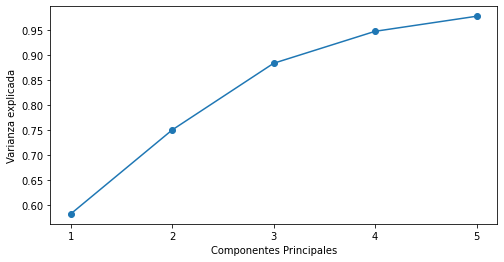

In [ ]:
#Grafico varianza explicada acumulada en función de las 5 componentes principales
list_x = list(range(1, len(varianza_explicada)+1))
plt.figure(figsize=(8, 4))
plt.xticks([1,2,3,4,5])
plt.plot(list_x, varianza_explicada.cumsum(), '-o')
plt.margins() 
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

In [ ]:
#Dropeo las columnas que fueron redimensionadas del dataset preprocesado
df_sin = df_o.copy()
df_sin.drop(columns=cols_num, inplace=True)

In [ ]:
#Concateno el dataset preprocesado con el resultante de aplicar pca, resultando en el nuevo redimensionado
frames = [df_sin, df_pca]
df_reducido = pd.concat(frames, axis=1)
df_reducido.dropna(inplace=True)
df_reducido.head()

,place_l2,place_l3,operation,property_type,property_currency,property_title,cp_1,cp_2,cp_3,cp_4,cp_5
25,Capital Federal,Barrio faltante,Venta,Casa,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA,6.395111,-0.434773,-0.472366,-0.199901,-0.938281
42,Capital Federal,Boca,Venta,Departamento,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO,-2.175676,-0.663737,-0.233156,-0.191839,-0.032031
43,Capital Federal,Boca,Venta,Departamento,USD,Departamento - 4 Ambientes - Catalinas Sur,-2.282190,-1.071370,-0.132815,0.020797,0.205945
49,Capital Federal,Once,Venta,Departamento,USD,Venta departamento 4 ambientes Once,-1.329714,-1.999400,-0.689634,0.211806,0.051427
53,Capital Federal,Boedo,Venta,PH,USD,PH 2 Ambientes c/Patio HECHO A NUEVO,4.612328,0.423928,-1.608492,-1.222813,0.126470
